Nama    : Dea Putri Nastiti

NIM     : 2241720117

Kelas   : TI 3E

# Praktikum 1

Klasifikasi SVM dengan Data Dummy

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

- **numpy (np)**: Menyediakan objek array multidimensi dan berbagai operasi matematika untuk array tersebut.
- **matplotlib.pyplot (plt)**: Digunakan untuk membuat visualisasi data seperti plot dan grafik.
- **scipy.stats**: Berisi banyak fungsi dan kelas untuk statistik dan probabilitas.
- **seaborn (sns)**: Dibangun di atas Matplotlib dan menyediakan antarmuka tingkat tinggi untuk membuat visualisasi statistik yang informatif dan menarik.

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

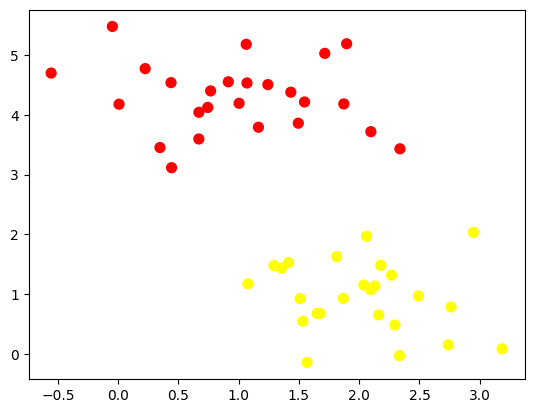

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

- **from sklearn.datasets import make_blobs**: Mengimpor fungsi make_blobs dari library scikit-learn (sklearn). Fungsi ini digunakan untuk membuat dataset sintetis dengan struktur cluster (gumpalan).
- **X, y = make_blobs(...)**: Memanggil fungsi make_blobs untuk membuat dataset.
  - **n_samples=50**: Jumlah sampel data yang akan dibuat (50 sampel).
  - **centers=2**: Jumlah cluster (pusat) yang akan dibuat (2 cluster).
  - **random_state=0**: Menentukan seed untuk generator angka acak, sehingga outputnya akan selalu sama setiap kali dijalankan.
  - **cluster_std=0.60**: Deviasi standar dari cluster, yang mengontrol seberapa tersebar data dalam setiap cluster.
- **plt.scatter(...)**: Membuat scatter plot menggunakan Matplotlib.
  - **X[:, 0]**: Mengambil semua baris (:) dan kolom pertama (0) dari array X, yang merupakan koordinat x dari data.
  - **X[:, 1]**: Mengambil semua baris (:) dan kolom kedua (1) dari array X, yang merupakan koordinat y dari data.
  - **c=y**: Mewarnai titik-titik data berdasarkan label yang ada di array y.
  - **s=50**: Menentukan ukuran titik-titik data.
  - **cmap='autumn'**: Menentukan colormap yang akan digunakan untuk mewarnai titik-titik data.

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

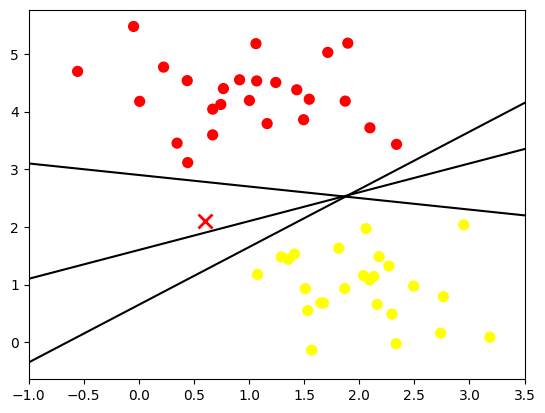

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

- **xfit = np.linspace(-1, 3.5)**: Membuat serangkaian nilai x dari -1 hingga 3.5. Ini akan digunakan untuk membuat garis lurus.
- **plt.scatter(...):** Membuat scatter plot data seperti sebelumnya.
-** plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)**: Menambahkan titik merah berbentuk 'x' di koordinat (0.6, 2.1).
- **for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]**:: Loop untuk membuat tiga garis lurus dengan gradien (m) dan intercept (b) yang berbeda.
  -  **plt.plot(xfit, m * xfit + b, '-k')** : Membuat garis lurus dengan persamaan y = mx + b dan warna hitam ('-k').
- **plt.xlim(-1, 3.5)**: Mengatur batas sumbu x pada plot.

Kode ini memvisualisasikan data yang dihasilkan oleh make_blobs dan menambahkan beberapa garis lurus sebagai ilustrasi. Garis-garis ini menunjukkan kemungkinan garis pemisah untuk memisahkan dua cluster data.

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

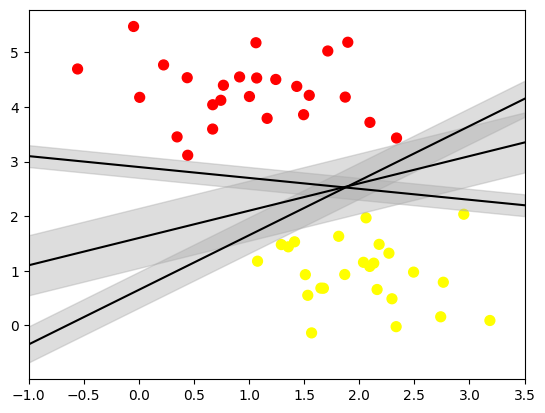

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Mmenambahkan margin di sekitar garis pemisah. Margin ini direpresentasikan oleh area abu-abu di sekitar setiap garis.

- **xfit = np.linspace(-1, 3.5)**: Membuat serangkaian nilai x untuk membuat garis.
- **plt.scatter(...)**: Membuat scatter plot data.
- **for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]**:: Loop untuk membuat tiga garis dan marginnya.
  - yfit = m * xfit + b: Menghitung nilai y untuk setiap x pada garis.
  - plt.plot(xfit, yfit, '-k'): Membuat garis.
  - plt.fill_between(...): Mengisi area di antara yfit - d dan yfit + d dengan warna abu-abu, menciptakan margin di sekitar garis.
    - edgecolor='none': Menghilangkan garis tepi pada margin.
    - color='#AAAAAA': Menentukan warna abu-abu.
    - alpha=0.4: Menentukan transparansi margin.
- plt.xlim(-1, 3.5): Mengatur batas sumbu x.

Kode ini mengilustrasikan konsep margin dalam Support Vector Machine (SVM). Margin adalah area di sekitar garis pemisah yang tidak boleh berisi titik data. SVM bertujuan untuk menemukan garis pemisah yang memaksimalkan margin ini.

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

**Penerappan fitting SVM**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Kode ini mendefinisikan dan melatih model Support Vector Classifier (SVC) dengan kernel linear.

- from sklearn.svm import SVC: Mengimpor kelas SVC dari library scikit-learn.
- model = SVC(kernel='linear', C=1E10): Membuat objek model SVC.
  - kernel='linear': Menentukan kernel linear untuk model. Kernel linear digunakan untuk data yang dapat dipisahkan secara linear.
  - C=1E10: Parameter regularisasi. Nilai yang sangat besar (1E10) menunjukkan penalti yang tinggi untuk kesalahan klasifikasi, yang mengarah ke model hard-margin.
- model.fit(X, y): Melatih model SVC menggunakan data X dan label y yang telah dibuat sebelumnya. Proses fitting ini akan mencari hyperplane optimal yang memisahkan data dengan margin terbesar.

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Kode ini mendefinisikan fungsi plot_svc_decision_function yang digunakan untuk memvisualisasikan decision boundary dan margin dari model SVC. Fungsi ini menerima model SVC yang sudah dilatih sebagai input dan menampilkan plot hasil fitting data.

- def plot_svc_decision_function(model, ax=None, plot_support=True):: Definisi fungsi dengan parameter:
  - model: Model SVC yang sudah dilatih.
  - ax: Opsional, axes untuk plot. Jika tidak diberikan, akan menggunakan axes yang sedang aktif.
  - plot_support: Opsional, boolean untuk menampilkan support vectors. Defaultnya True.
- if ax is None: ax = plt.gca(): Jika ax tidak diberikan, gunakan axes yang sedang aktif.
- xlim = ax.get_xlim(): Mendapatkan batas sumbu x dari axes.
- ylim = ax.get_ylim(): Mendapatkan batas sumbu y dari axes.
- x = np.linspace(xlim[0], xlim[1], 30): Membuat serangkaian nilai x untuk grid.
- y = np.linspace(ylim[0], ylim[1], 30): Membuat serangkaian nilai y untuk grid.
- Y, X = np.meshgrid(y, x): Membuat grid dari nilai x dan y.
- xy = np.vstack([X.ravel(), Y.ravel()]).T: Menggabungkan nilai x dan y menjadi array koordinat.
- P = model.decision_function(xy).reshape(X.shape): Menghitung decision function untuk setiap titik pada grid.
- ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']): Membuat contour plot untuk memvisualisasikan decision boundary dan margin.
- if plot_support: ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none'): Jika plot_support True, maka tampilkan support vectors dengan marker khusus.
- ax.set_xlim(xlim): Mengatur batas sumbu x pada plot.
- ax.set_ylim(ylim): Mengatur batas sumbu y pada plot.

Fungsi ini akan menghasilkan plot yang menunjukkan decision boundary, margin, dan support vectors dari model SVC.

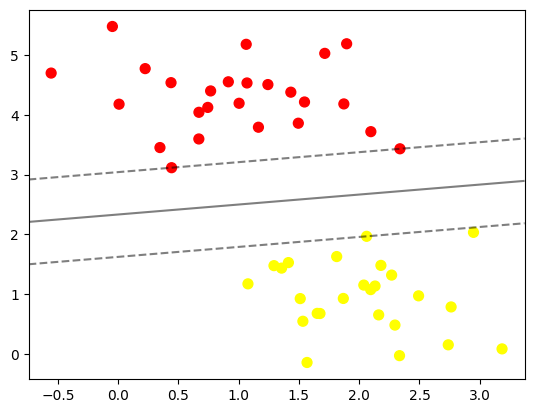

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Kode ini memvisualisasikan data points dan decision boundary dari model SVC yang telah dilatih sebelumnya.

- plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Membuat scatter plot untuk menampilkan data points.
  - X[:, 0]: Nilai fitur pertama dari dataset.
  - X[:, 1]: Nilai fitur kedua dari dataset.
  - c=y: Memberi warna pada data points berdasarkan label (y).
  - s=50: Ukuran dari data points.
  - cmap='autumn': Colormap yang digunakan.
- plot_svc_decision_function(model): Memanggil fungsi plot_svc_decision_function yang telah didefinisikan sebelumnya untuk memvisualisasikan decision boundary dan margin dari model SVC (model).

Akan menghasilkan visualisasi data points yang dipisahkan oleh decision boundary dari model SVC. Decision boundary ini merupakan garis (atau hyperplane pada dimensi yang lebih tinggi) yang memisahkan data ke dalam kelas yang berbeda.

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Kode ini akan menampilkan data points yang menjadi support vectors dari model SVC.

- model.support_vectors_: Atribut dari objek model SVC yang berisi data points yang menjadi support vectors. Support vectors adalah data points yang berada di margin atau di sisi yang salah dari margin. Data points ini berperan penting dalam menentukan decision boundary.

Dengan menjalankan kode model.support_vectors_, akan terlihat array yang berisi koordinat dari support vectors. Informasi ini berguna untuk memahami data points mana yang paling berpengaruh dalam model SVC.

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

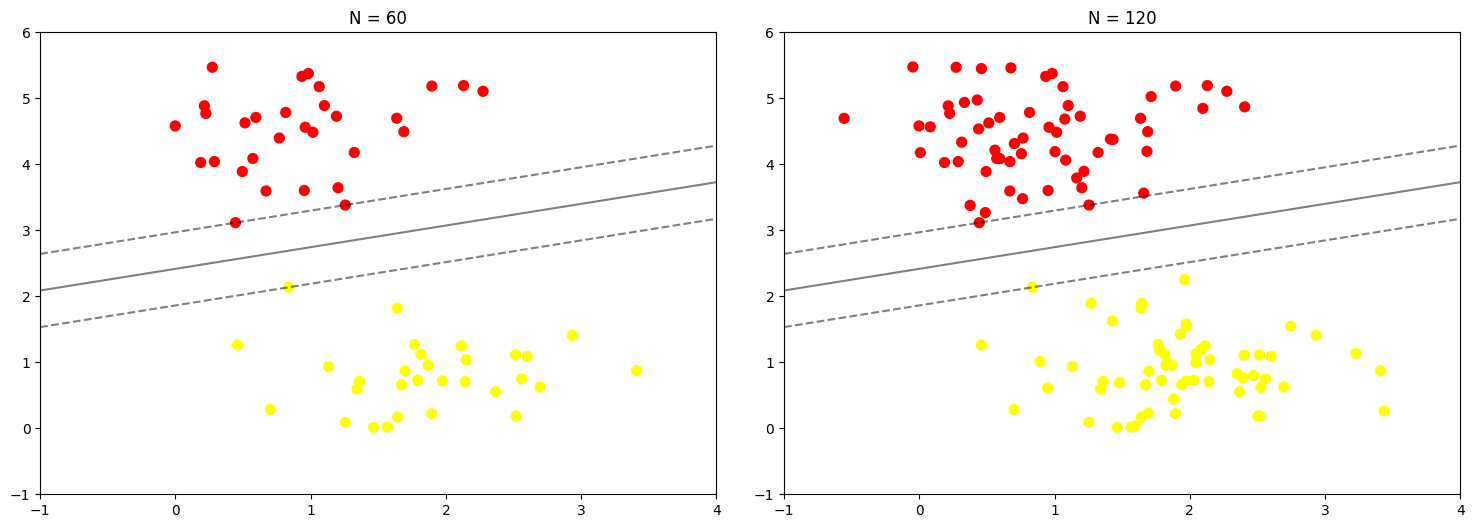

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Kode ini mendefinisikan fungsi plot_svm untuk membuat plot data dan decision boundary dari model SVC dengan jumlah data yang bervariasi (N).

- def plot_svm(N=10, ax=None):: Definisi fungsi plot_svm dengan parameter:
  - N=10: Jumlah data points yang akan digunakan untuk training model. Defaultnya 10.
  - ax=None: Opsional, axes untuk plot. Jika tidak diberikan, akan menggunakan axes yang sedang aktif.
- X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60): Membuat dataset sintetis menggunakan make_blobs dengan 200 data points.
- X = X[:N]: Mengambil N data points pertama dari dataset.
- y = y[:N]: Mengambil N label pertama dari dataset.
- model = SVC(kernel='linear', C=1E10): Membuat objek model SVC dengan kernel linear dan parameter regularisasi C yang besar.
- model.fit(X, y): Melatih model SVC menggunakan data dan label yang telah di slicing.
- ax = ax or plt.gca(): Jika ax tidak diberikan, gunakan axes yang sedang aktif.
- ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Membuat scatter plot untuk menampilkan data points pada axes.
- ax.set_xlim(-1, 4): Mengatur batas sumbu x pada plot.
- ax.set_ylim(-1, 6): Mengatur batas sumbu y pada plot.
- plot_svc_decision_function(model, ax): Memanggil fungsi plot_svc_decision_function untuk menampilkan decision boundary dan margin dari model SVC pada axes.

Fungsi ini digunakan untuk menunjukkan bagaimana decision boundary dari model SVC dipengaruhi oleh jumlah data yang digunakan untuk training. Semakin banyak data yang digunakan, semakin baik model dalam menggeneralisasi dan memisahkan data.

**Data Tidak Terpisah Secara Linier**

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

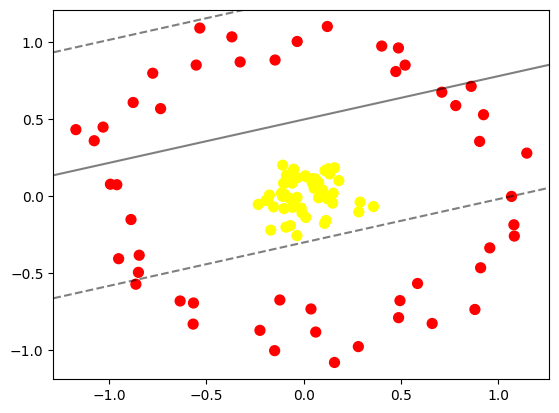

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Kode ini mendemonstrasikan kasus data non-linear yang tidak dapat dipisahkan dengan baik menggunakan kernel linear pada model SVC.

- from sklearn.datasets import make_circles: Mengimpor fungsi make_circles untuk membuat dataset sintetis berbentuk lingkaran.
- X, y = make_circles(100, factor=.1, noise=.1): Membuat dataset dengan 100 sampel, faktor skala 0.1, dan noise 0.1. Faktor skala mengontrol jarak antara lingkaran dalam dan luar, noise menambahkan variasi acak pada data.
- clf = SVC(kernel='linear').fit(X, y): Membuat dan melatih model SVC dengan kernel linear pada data non-linear.
- plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Membuat scatter plot untuk menampilkan data points.
- plot_svc_decision_function(clf, plot_support=False): Memvisualisasikan decision boundary dari model SVC. plot_support=False menyembunyikan support vectors pada plot.

Hasil visualisasi akan menunjukkan bahwa decision boundary linear tidak mampu memisahkan data berbentuk lingkaran dengan baik. Hal ini menunjukkan kelemahan kernel linear pada data non-linear. Untuk mengatasi masalah ini, diperlukan kernel non-linear seperti RBF (Radial Basis Function).

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [ ]:
r = np.exp(-(X ** 2).sum(1))

Kode ini menghitung nilai radial basis function (RBF) untuk setiap data point dalam dataset X. Nilai ini digunakan untuk memproyeksikan data ke dimensi yang lebih tinggi agar dapat dipisahkan secara linear.

- X ** 2: Mengkuadratkan setiap elemen dalam array X.
- (X ** 2).sum(1): Menjumlahkan nilai kuadrat untuk setiap baris (data point).
- np.exp(-(X ** 2).sum(1)): Menghitung eksponensial negatif dari hasil penjumlahan.

Hasilnya disimpan dalam variabel r. Nilai r ini merepresentasikan jarak dari setiap data point ke pusat yang telah ditentukan. Data dengan nilai r yang sama akan membentuk lingkaran.

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 9.59475288e-02,  4.08503556e-02],
       [-5.16942497e-02,  1.74737920e-01],
       [-7.76337887e-01,  7.97157160e-01],
       [ 1.02054827e-02,  1.27246425e-01],
       [ 5.85150392e-01, -5.65913680e-01],
       [ 6.03011805e-02,  1.11649861e-01],
       [ 4.87662522e-01, -7.87469650e-01],
       [-3.26935435e-01,  8.70077623e-01],
       [ 4.42608457e-02,  1.13336296e-01],
       [ 3.72233260e-02, -7.31025822e-01],
       [ 1.09234333e-01,  1.65824117e-01],
       [-8.77056788e-01,  6.07430269e-01],
       [-1.08355501e-01,  2.01109963e-01],
       [ 4.94733434e-01, -6.76900742e-01],
       [-8.45944263e-01, -3.82673300e-01],
       [ 1.32887418e-01,  1.44558007e-01],
       [-1.01310588e-01, -8.04876140e-02],
       [ 9.56593256e-01, -3.35065846e-01],
       [ 7.81459258e-01,  5.87351254e-01],
       [-1.22865038e-01, -6.72789975e-01],
       [ 4.73350142e-01,  8.07967597e-01],
       [ 1.14691015e+00,  2.79159198e-01],
       [ 1.07006140e-01, -1.76191789e-01],
       [-6.42486937e-02,  1.28048655e-01],
       [-9.61195671e-01,  7.44014524e-02],
       [ 8.60873342e-01,  7.11927976e-01],
       [-3.47189320e-02,  1.18910904e-01],
       [-5.34368701e-01,  1.08976814e+00],
       [-5.80906624e-02, -7.18495634e-02],
       [-2.25155485e-01, -8.69668658e-01],
       [-9.51757214e-01, -4.05231670e-01],
       [-1.17149467e+00,  4.31444199e-01],
       [ 1.06832143e+00, -1.53560398e-03],
       [-1.84416348e-01, -2.09843364e-02],
       [-5.68602434e-01, -8.29160743e-01],
       [ 6.60389442e-01, -8.25128185e-01],
       [-1.03689031e-01,  8.45152061e-02],
       [ 7.63682683e-02, -9.93373499e-03],
       [ 4.26310453e-02,  8.87528807e-02],
       [-1.47356512e-01,  8.82650508e-01],
       [ 1.58602197e-01,  1.84387841e-01],
       [ 1.48363475e-01, -4.47058539e-02],
       [ 5.30173995e-02,  5.20653312e-02],
       [-9.93213334e-02,  8.33645862e-02],
       [-5.66941049e-01, -6.92343181e-01],
       [-1.55685603e-01, -6.91698475e-02],
       [-5.46062891e-02, -3.47415277e-02],
       [ 1.51439925e-01,  1.96020752e-02],
       [ 1.26443069e-01,  1.77818115e-01],
       [ 2.83368393e-01, -1.01814589e-01],
       [-3.50237363e-02, -2.55469778e-01],
       [ 4.01030362e-01,  9.73131959e-01],
       [-9.93923689e-01,  7.75944455e-02],
       [ 5.21310910e-01,  8.49521384e-01],
       [-9.79906933e-02,  1.12648839e-02],
       [ 1.08272628e+00, -2.58468434e-01],
       [-7.36004201e-01,  5.67542471e-01],
       [ 1.08064083e+00, -1.85456342e-01],
       [-1.14583594e-01,  1.97360111e-02],
       [ 7.09995970e-01,  6.73978410e-01],
       [-1.07727617e+00,  3.59508050e-01],
       [ 2.89654782e-01, -3.82227301e-02],
       [ 1.14716978e-01, -1.57628401e-01],
       [ 7.70049275e-02,  8.72580517e-02],
       [-3.69598764e-01,  1.03278105e+00],
       [-1.35462900e-02, -7.68808053e-02],
       [-5.98931600e-02,  8.48218158e-02],
       [ 2.80712452e-01, -9.74969142e-01],
       [-6.35585546e-01, -6.79311659e-01],
       [-9.33157653e-03, -1.08152360e-01],
       [-1.08527170e-01, -8.56801921e-04],
       [ 9.04343469e-01,  3.55100870e-01],
       [-1.76747861e-01,  7.32509286e-03],
       [ 3.58434358e-01, -6.73329933e-02],
       [ 1.21260916e-01,  1.10007849e+00],
       [-5.52902584e-01,  8.49893181e-01],
       [-7.73237970e-02, -1.03606202e-02],
       [ 9.09435873e-01, -4.64041536e-01],
       [-8.89026684e-02,  1.35398170e-01],
       [-1.49619949e-01, -1.00114366e+00],
       [ 8.80094814e-01, -7.34277336e-01],
       [ 1.03493786e-02, -1.37445760e-01],
       [ 1.21239823e-01, -1.62096724e-02],
       [-8.88219093e-01, -1.51329069e-01],
       [ 1.80563023e-01,  1.01151800e-01],
       [ 6.16639978e-02, -8.80638284e-01],
       [-6.84807466e-02, -1.90885524e-01],
       [-1.03172980e+00,  4.47813671e-01],
       [-9.13935653e-02, -2.00634584e-01],
       [ 7.75803373e-03,  1.31986754e-01],
       [-3.37466573e-02,  1.00285382e+00],
       [-8.50013898e-01, -4.93646830e-01

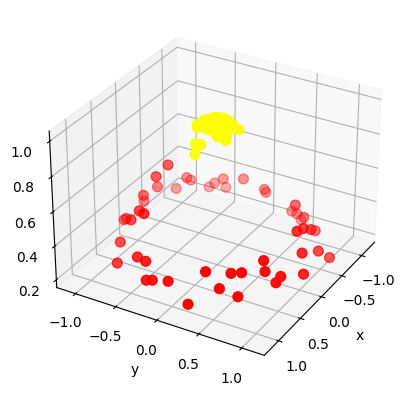

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

Kode ini mendefinisikan fungsi untuk membuat plot 3D dari data yang telah diproyeksikan menggunakan RBF dan memungkinkan interaksi untuk mengubah sudut pandang plot.

- from mpl_toolkits import mplot3d: Mengimpor modul mplot3d untuk membuat plot 3D.
- from ipywidgets import interact, fixed: Mengimpor fungsi interact dan fixed untuk membuat widget interaktif.
- def plot_3D(elev=30, azim=30, X=X, y=y):: Mendefinisikan fungsi plot_3D dengan parameter:
  - elev=30: Sudut elevasi plot.
  - azim=30: Sudut azimut plot.
  - X=X: Data points.
  - y=y: Label data points.
- ax = plt.subplot(projection='3d'): Membuat subplot 3D.
- ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn'): Membuat scatter plot 3D dari data points dengan nilai r sebagai sumbu z.
- ax.view_init(elev=elev, azim=azim): Mengatur sudut pandang plot.
- ax.set_xlabel('x'): Memberi label sumbu x.
- ax.set_ylabel('y'): Memberi label sumbu y.
- ax.set_zlabel('r'): Memberi label sumbu z.
interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180), X=fixed(X), y=fixed(y)): Membuat widget interaktif untuk mengubah sudut elevasi (elev) dan azimut (azim) plot. Data points (X) dan label (y) difiksasi.

Dengan menjalankan kode ini, akan mendapatkan plot 3D dari data yang dapat diputar dan dilihat dari berbagai sudut. Visualisasi ini menunjukkan bagaimana data non-linear dapat diproyeksikan ke dimensi yang lebih tinggi untuk dipisahkan secara linear.

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Kode ini mendefinisikan dan melatih model SVC dengan kernel RBF (Radial Basis Function) untuk data non-linear.

- clf = SVC(kernel='rbf', C=1E6):
  - kernel='rbf': Menentukan kernel RBF. Kernel ini memetakan data ke ruang dimensi tinggi yang memungkinkan pemisahan non-linear.
  - C=1E6: Parameter regularisasi yang besar. Nilai yang besar menunjukkan penalti yang tinggi untuk kesalahan klasifikasi, menghasilkan model hard-margin yang mencoba untuk mengklasifikasikan semua data point dengan benar.
- clf.fit(X, y): Melatih model SVC dengan data X dan label y. Model akan mempelajari decision boundary non-linear berdasarkan kernel RBF.

Kernel RBF efektif untuk data non-linear karena dapat memodelkan decision boundary yang kompleks. Parameter C mengontrol trade-off antara memaksimalkan margin dan meminimalkan kesalahan klasifikasi.

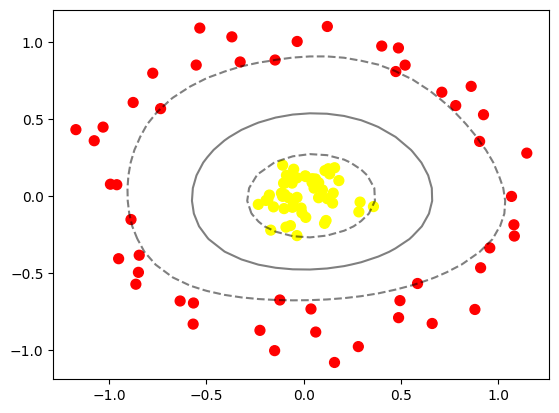

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

Kode ini memvisualisasikan data points, decision boundary, dan support vectors dari model SVC yang telah dilatih dengan kernel RBF.

- plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Membuat scatter plot untuk menampilkan data points.
- plot_svc_decision_function(clf): Memvisualisasikan decision boundary dan margin dari model SVC (clf) yang telah dilatih dengan kernel RBF. Decision boundary akan berbentuk non-linear.
- plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none'): Menampilkan support vectors dengan marker yang lebih besar dan tanpa warna isi.
  - clf.support_vectors_[:, 0]: Koordinat x dari support vectors.
  - clf.support_vectors_[:, 1]: Koordinat y dari support vectors.
  - s=300: Ukuran marker support vectors.
  - lw=1: Lebar garis marker.
  - facecolors='none': Tanpa warna isi marker.

Dengan menjalankan kode ini, akan terlihat plot data points yang dipisahkan oleh decision boundary non-linear. Support vectors ditampilkan sebagai marker kosong yang menandai data points yang paling berpengaruh dalam menentukan decision boundary.

**Data Overlap**

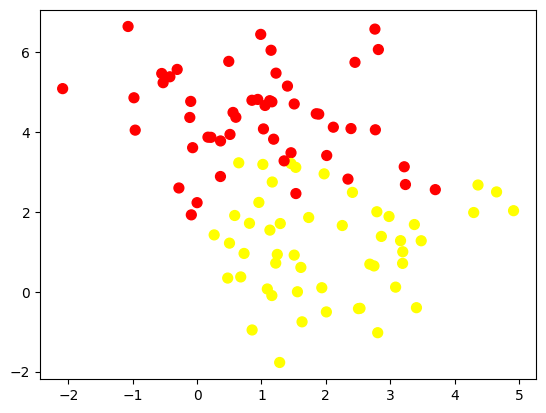

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Kode ini membuat dan memvisualisasikan dataset sintetis menggunakan make_blobs dengan cluster yang overlapping (tumpang tindih).

- X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2): Membuat dataset dengan 100 sampel, 2 cluster, dan deviasi standar 1.2. Deviasi standar yang lebih besar (1.2) menyebabkan data points dalam cluster lebih tersebar dan mengakibatkan overlapping antar cluster.
- plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Membuat scatter plot untuk menampilkan data points.

Visualisasi data akan menunjukkan dua cluster yang tumpang tindih. Dataset seperti ini lebih sulit dipisahkan dibandingkan dengan data yang terpisah secara jelas. Model SVM dengan hard-margin mungkin tidak optimal untuk kasus ini.

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

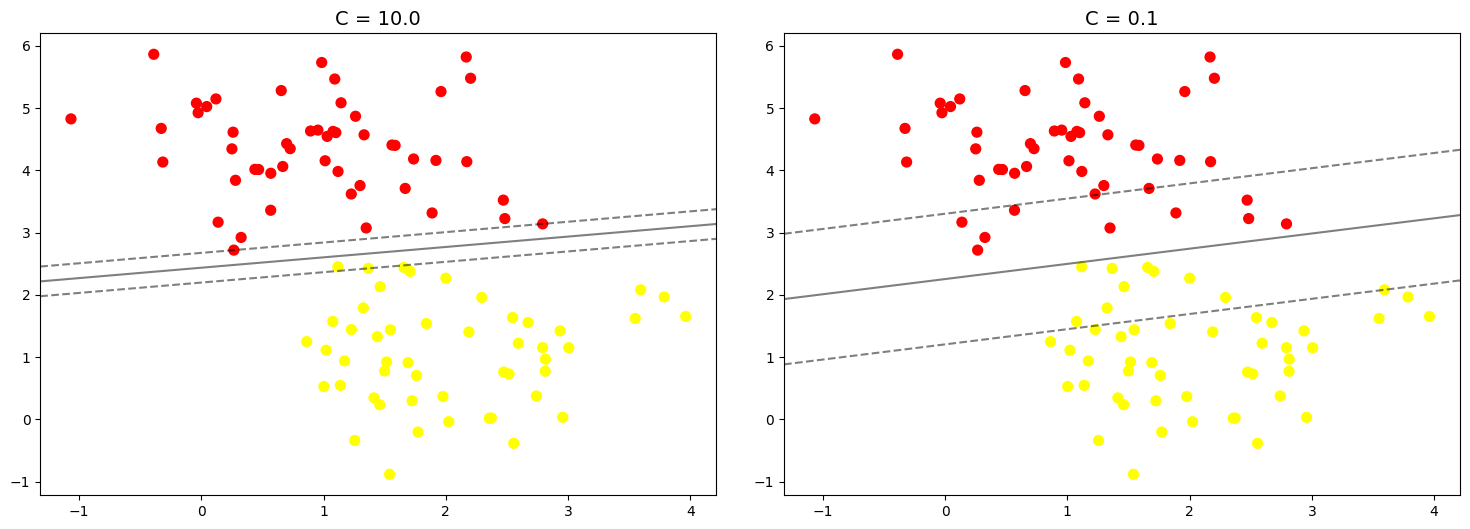

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Kode ini mendemonstrasikan pengaruh parameter regularisasi C pada model SVC dengan kernel linear untuk data yang overlapping.

- X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8): Membuat dataset dengan cluster yang overlapping.
- fig, ax = plt.subplots(1, 2, figsize=(16, 6)): Membuat figure dan dua axes untuk plot.
- fig.subplots_adjust(...): Menyesuaikan layout figure.
- for axi, C in zip(ax, [10.0, 0.1]):: Loop untuk membuat dan melatih model SVC dengan dua nilai C yang berbeda (10.0 dan 0.1).
  - model = SVC(kernel='linear', C=C).fit(X, y): Membuat dan melatih model SVC.
  - axi.scatter(...): Membuat scatter plot data pada axes.
  - plot_svc_decision_function(model, axi): Memvisualisasikan decision boundary dan margin pada axes.
  - axi.scatter(...): Menampilkan support vectors pada axes.
  
Kode ini akan menghasilkan dua plot yang menunjukkan decision boundary dari model SVC dengan nilai C yang berbeda. Nilai C yang besar (10.0) menghasilkan model hard-margin yang mencoba memisahkan semua data point dengan benar. Nilai C yang kecil (0.1) menghasilkan model soft-margin yang mengizinkan beberapa kesalahan klasifikasi untuk mendapatkan margin yang lebih lebar.

Visualisasi ini membantu untuk memahami bagaimana parameter C mengontrol trade-off antara memaksimalkan margin dan meminimalkan kesalahan klasifikasi pada model SVC.

# Praktikum 2

Klasifikasi SVM Pada Data Citra

dataset yang digunakan adalah Labeled Faces in the Wild dataset (sebuah dataset yang berisi ribuan wajah publik figur).

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


Kode ini mengunduh dan menampilkan informasi dasar tentang dataset Labeled Faces in the Wild (LFW) yang digunakan untuk face recognition.

- from sklearn.datasets import fetch_lfw_people: Mengimpor fungsi fetch_lfw_people dari scikit-learn untuk mengunduh dataset LFW.
- faces = fetch_lfw_people(min_faces_per_person=60): Mengunduh dataset dan hanya mengambil gambar orang yang memiliki minimal 60 gambar.
- print(faces.target_names): Menampilkan nama orang yang ada di dataset.
- print(len(faces.target_names)): Menampilkan jumlah orang yang ada di dataset.
- print(faces.images.shape): Menampilkan dimensi gambar dalam dataset (jumlah gambar, tinggi, lebar).

Dataset LFW berisi gambar wajah orang-orang terkenal yang diambil dari internet. Kode ini mempersiapkan data untuk digunakan dalam tugas face recognition dengan model machine learning.

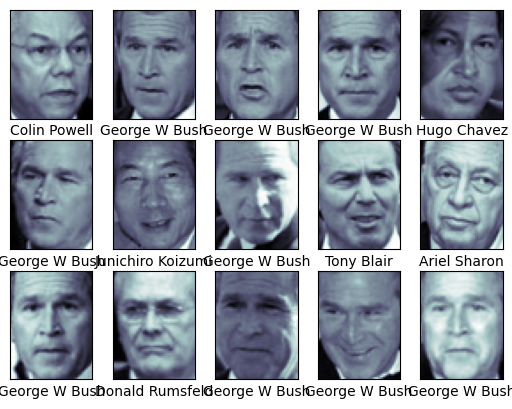

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Kode ini menampilkan beberapa contoh gambar wajah dari dataset LFW.

- fig, ax = plt.subplots(3, 5): Membuat figure dan axes untuk plot. Figure akan berisi 3 baris dan 5 kolom subplot.
- for i, axi in enumerate(ax.flat):: Loop melalui setiap axes dalam figure.
  - axi.imshow(faces.images[i], cmap='bone'): Menampilkan gambar pada - axes. cmap='bone' digunakan untuk menampilkan gambar dalam skala abu-abu.
  - axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]]): Mengatur label sumbu x sebagai nama orang yang ada di gambar dan menghilangkan tanda centang pada sumbu x dan y.

Kode ini akan menampilkan 15 gambar wajah dari dataset LFW, dengan setiap gambar diberi label nama orang yang sesuai.

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Kode ini mendefinisikan pipeline untuk face recognition yang terdiri dari Principal Component Analysis (PCA) untuk reduksi dimensi dan Support Vector Classifier (SVC) untuk klasifikasi.

- from sklearn.svm import SVC: Mengimpor kelas SVC.
- from sklearn.decomposition import PCA as RandomizedPCA: Mengimpor kelas PCA dan menamainya RandomizedPCA.
- from sklearn.pipeline import make_pipeline: Mengimpor fungsi make_pipeline.
- pca = RandomizedPCA(n_components=150, whiten=True, random_state=42): Membuat objek PCA untuk reduksi dimensi.
  - n_components=150: Jumlah komponen utama yang akan digunakan (150 komponen).
  - whiten=True: Melakukan whitening untuk menstandarkan fitur.
  - random_state=42: Menentukan seed untuk reproduksibilitas.
- svc = SVC(kernel='rbf', class_weight='balanced'): Membuat objek SVC.
  - kernel='rbf': Menggunakan kernel RBF.
  - class_weight='balanced': Menyeimbangkan bobot kelas untuk menangani data yang tidak seimbang.
- model = make_pipeline(pca, svc): Membuat pipeline yang menggabungkan
PCA dan SVC. Data akan direduksi dimensinya dengan PCA sebelum diklasifikasikan dengan SVC.

Pipeline ini menyederhanakan proses machine learning dengan menggabungkan beberapa langkah menjadi satu objek.

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Kode ini membagi dataset LFW menjadi data training dan data testing.

- from sklearn.model_selection import train_test_split: Mengimpor fungsi train_test_split dari scikit-learn.
- Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42): Membagi data dan label menjadi data training dan testing.
  - faces.data: Data gambar wajah.
  - faces.target: Label (nama orang) yang sesuai dengan gambar.
  - random_state=42: Menentukan seed untuk reproduksibilitas.

Fungsi train_test_split membagi data secara acak. Data training digunakan untuk melatih model, sedangkan data testing digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 45s, sys: 25.1 s, total: 2min 10s
Wall time: 1min 36s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


Kode ini melakukan hyperparameter tuning pada model SVC menggunakan GridSearchCV untuk mencari kombinasi parameter terbaik.

- from sklearn.model_selection import GridSearchCV: Mengimpor kelas GridSearchCV.
- param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}: Mendefinisikan grid parameter yang akan dicoba.
  - svc__C: Parameter regularisasi untuk SVC.
  - svc__gamma: Parameter kernel RBF untuk SVC.
- grid = GridSearchCV(model, param_grid): Membuat objek GridSearchCV.
  - model: Pipeline yang akan di tuning.
  - param_grid: Grid parameter yang akan dicoba.
- %time grid.fit(Xtrain, ytrain): Melatih GridSearchCV pada data training dan mengukur waktu eksekusi. GridSearchCV akan mencoba semua kombinasi parameter dalam param_grid dan mengevaluasi performanya menggunakan cross-validation.
- print(grid.best_params_): Menampilkan kombinasi parameter terbaik yang ditemukan.
- print(grid.best_score_): Menampilkan skor terbaik yang dicapai dengan parameter terbaik.

GridSearchCV membantu mengotomatiskan proses pencarian parameter terbaik untuk model machine learning.

prediksi label untuk data testing

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Kode ini menggunakan model dengan parameter terbaik hasil dari GridSearchCV untuk melakukan prediksi pada data testing.

- model = grid.best_estimator_: Mengambil model dengan parameter terbaik yang telah ditemukan oleh GridSearchCV.
- yfit = model.predict(Xtest): Melakukan prediksi pada data testing (Xtest) menggunakan model terbaik dan menyimpan hasilnya dalam variabel yfit.

Variabel yfit sekarang berisi prediksi label untuk setiap data point dalam data testing. Prediksi ini dapat dibandingkan dengan label sebenarnya (ytest) untuk mengevaluasi performa model.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

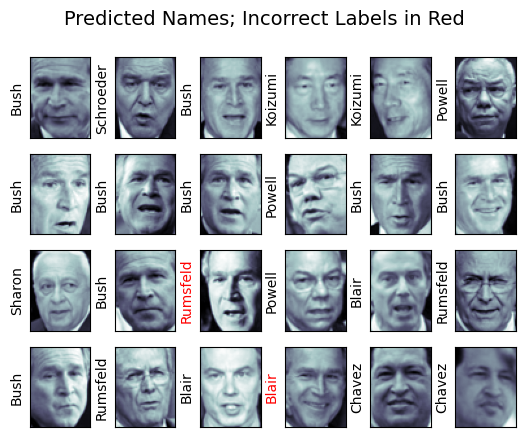

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Kode ini memvisualisasikan hasil prediksi pada data testing dan menandai label yang salah dengan warna merah.

- fig, ax = plt.subplots(4, 6): Membuat figure dan axes untuk plot dengan 4 baris dan 6 kolom.
- for i, axi in enumerate(ax.flat):: Melakukan loop pada setiap axes.
  - axi.imshow(Xtest[i].reshape(62, 47), cmap='bone'): Menampilkan gambar dari data testing pada axes.
  - axi.set(xticks=[], yticks=[]): Menghilangkan tick pada sumbu x dan y.
  - axi.set_ylabel(...): Mengatur label pada sumbu y sebagai nama orang yang diprediksi.
    - Jika prediksi benar (yfit[i] == ytest[i]), warna label hitam.
    - Jika prediksi salah, warna label merah.
- fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14): Menambahkan judul pada figure.

Kode ini akan menampilkan 24 gambar dari data testing. Setiap gambar diberi label nama orang yang diprediksi oleh model. Label yang berwarna merah menandakan prediksi yang salah. Visualisasi ini membantu untuk melihat performa model dan jenis kesalahan yang dibuat.

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Kode ini menampilkan laporan klasifikasi yang berisi metrik evaluasi performa model pada data testing.

- from sklearn.metrics import classification_report: Mengimpor fungsi classification_report.
- print(classification_report(ytest, yfit, target_names=faces.target_names)): Menampilkan laporan klasifikasi.
  - ytest: Label sebenarnya dari data testing.
  - yfit: Label yang diprediksi oleh model.
  - target_names=faces.target_names: Nama-nama kelas (nama orang).

Laporan klasifikasi akan menampilkan precision, recall, f1-score, dan support untuk setiap kelas, serta rata-rata dari metrik tersebut. Metrik ini memberikan informasi detail tentang performa model untuk setiap kelas dan secara keseluruhan.

Text(113.92222222222219, 0.5, 'predicted label')

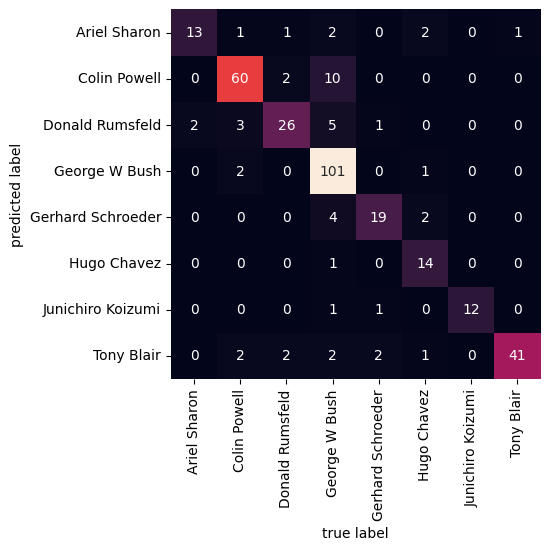

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Kode ini menampilkan confusion matrix yang memberikan visualisasi detail tentang performa model pada data testing.

- from sklearn.metrics import confusion_matrix: Mengimpor fungsi confusion_matrix.
- mat = confusion_matrix(ytest, yfit): Menghitung confusion matrix.
- sns.heatmap(...): Membuat heatmap dari confusion matrix menggunakan Seaborn.
  - mat.T: Transpose dari confusion matrix.
  - square=True: Membuat sel heatmap berbentuk persegi.
  - annot=True: Menampilkan nilai di dalam sel.
  - fmt='d': Format nilai sebagai integer.
  - cbar=False: Menghilangkan color bar.
  - xticklabels=faces.target_names: Label untuk sumbu x (nama orang).
  - yticklabels=faces.target_names: Label untuk sumbu y (nama orang).
- plt.xlabel('true label'): Memberi label sumbu x.
- plt.ylabel('predicted label'): Memberi label sumbu y.

Confusion matrix menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.

- Nilai pada diagonal utama menunjukkan prediksi yang benar.
- Nilai di luar diagonal utama menunjukkan prediksi yang salah.

Visualisasi confusion matrix membantu untuk menganalisis jenis kesalahan yang dibuat oleh model dan mengidentifikasi kelas yang sulit dibedakan.

# Praktikum 3

Klasifikasi Naive Bayes dengan Data Dummy

Pada percobaan ini kita akan menggunakan data dummy (sintentis) untuk membuat sebuah model Naive Bayes. Untuk membuat data dummy, kita dapat menggunakan fungsi make_classification dari library scikit-learn. Selanjutnya, kita akan membuat model Multinomial Naive Bayes dengan menggunakan MultinomialNB dan model Gaussian Naive Bayes menggunakan GaussianNB.

**Mendefiniskan Data Dummy**

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[142  79]
 [182  74]
 [ 97  87]
 [  6 158]
 [189  78]
 [  4 124]
 [311  28]
 [ 61 125]
 [ 81 156]
 [147 202]
 [119 105]
 [ 80 139]
 [ 10  97]
 [100  86]
 [ 14   2]
 [ 21  99]
 [342  10]
 [191  42]
 [ 25  56]
 [ 44  51]
 [ 64 196]
 [142  22]
 [ 55  42]
 [200 110]
 [ 21  34]
 [ 80 195]
 [154  71]
 [ 43  54]
 [  4 254]
 [ 49 164]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Kode ini menghasilkan data dummy untuk klasifikasi dan kemudian mengubah tipe data fitur (X) menjadi integer.

- import numpy as np: Mengimpor library NumPy untuk operasi numerik.
- from sklearn.datasets import make_classification: Mengimpor fungsi make_classification untuk membuat data dummy.
- X, y = make_classification(...): Membuat data dummy dengan 30 sampel, 2 fitur, 2 kelas, dan parameter lainnya (informatif, redundant, repeated, shuffle) diatur sesuai kebutuhan.
- X = np.absolute(X): Mengubah semua nilai fitur menjadi positif (nilai absolut).
- X = np.round(X, 2) * 100: Membulatkan nilai fitur menjadi 2 angka di belakang koma dan mengalikan dengan 100 untuk menghilangkan koma.
- X = X.astype(int): Mengubah tipe data fitur menjadi integer.
- print(X): Menampilkan data fitur (X) yang sudah diubah menjadi integer.
- print(y): Menampilkan label kelas (y).

Kode ini menghasilkan data dummy yang siap digunakan untuk algoritma klasifikasi yang membutuhkan data fitur berupa integer, seperti Multinomial Naive Bayes.

Parameter yang digunakan pada fungsi make_classification adalah,

- n_samples: jumlah sampel yang diinginkan
- n_features: jumlah fitur yang digunakan
- n_classes: jumlah kelas
- n_informative: jumlah fitur yang memiliki korelasi dengan kelas
- n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas
- n_repeated: jumlah fitur yang diulang

**(Opsional) Membuat Data Frame**
Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya



In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,142,79,0
1,182,74,0
2,97,87,0
3,6,158,0
4,189,78,0


Kode ini membuat DataFrame Pandas dari data fitur (X) dan label kelas (y) yang telah dihasilkan sebelumnya.

- import pandas as pd: Mengimpor library Pandas untuk manipulasi data.
- y_new = y.reshape(len(y), 1): Mengubah bentuk array y (label kelas) menjadi 2 dimensi. Ini diperlukan agar y dapat digabungkan dengan X (fitur) yang juga berdimensi 2.
- data = np.concatenate((X, y_new), axis=1): Menggabungkan array X dan y_new secara horizontal (axis=1) menjadi satu array data.
- nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']: Mendefinisikan nama kolom untuk DataFrame.
- df = pd.DataFrame(data, columns=nama_kolom): Membuat DataFrame Pandas dari array data dengan nama kolom yang telah didefinisikan.
- df.head(): Menampilkan 5 baris pertama dari DataFrame.

Dengan membuat DataFrame, data menjadi lebih terstruktur dan mudah dibaca. Anda dapat melakukan berbagai operasi manipulasi dan analisis data dengan lebih mudah menggunakan Pandas DataFrame.

Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,142,79,Kelas B
1,182,74,Kelas B
2,97,87,Kelas B
3,6,158,Kelas B
4,189,78,Kelas B


Kode ini mengganti label angka (0 dan 1) pada DataFrame dengan label teks ('Kelas A' dan 'Kelas B') agar lebih mudah dibaca dan diinterpretasi.

- labels = { 1 : 'Kelas A', 0 : 'Kelas B' }: Membuat dictionary labels yang memetakan label angka (1 dan 0) ke label teks ('Kelas A' dan 'Kelas B').
- df_label = df.copy(): Membuat salinan DataFrame df dan menyimpannya dalam variabel df_label. Ini dilakukan untuk menghindari perubahan langsung pada DataFrame asli.
- df_label['Label'] = df_label['Label'].map(labels): Mengganti nilai pada kolom 'Label' di df_label menggunakan dictionary labels. Fungsi map akan mencocokkan setiap nilai di kolom 'Label' dengan key di dictionary labels dan menggantinya dengan value yang sesuai.
- df_label.head(): Menampilkan 5 baris pertama dari DataFrame df_label untuk melihat perubahan label.

Sekarang, DataFrame df_label memiliki kolom 'Label' dengan nilai teks 'Kelas A' dan 'Kelas B', yang lebih informatif daripada label angka 0 dan 1.


**(Opsional) Visualisasi Data**

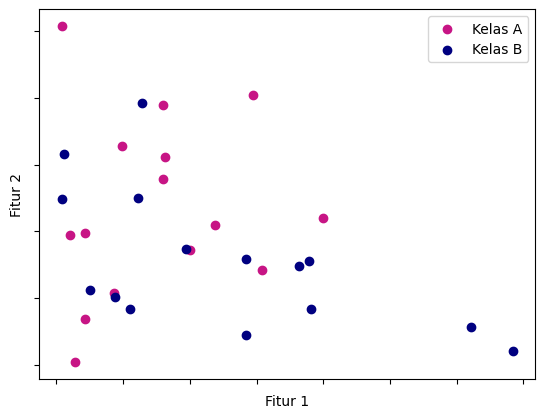

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Kode ini memvisualisasikan data dalam DataFrame df_label dengan scatter plot, di mana setiap kelas ditampilkan dengan warna yang berbeda.

- import matplotlib.pyplot as plt: Mengimpor library Matplotlib untuk visualisasi data.
- colors = { 'class_a': 'MediumVioletRed', 'class_b': 'Navy' }: Membuat dictionary colors yang memetakan nama kelas ('class_a' dan 'class_b') ke warna yang diinginkan.
- gb = df_label.groupby(['Label']): Mengelompokkan DataFrame df_label berdasarkan kolom 'Label'.
- class_a = gb.get_group('Kelas A'): Mengambil data untuk 'Kelas A' dari hasil pengelompokan.
- class_b = gb.get_group('Kelas B'): Mengambil data untuk 'Kelas B' dari hasil pengelompokan.
- plt.scatter(...): Membuat scatter plot untuk 'Kelas A' dengan:
  - x=class_a['Fitur 1']: Nilai 'Fitur 1' sebagai koordinat x.
  - y=class_a['Fitur 2']: Nilai 'Fitur 2' sebagai koordinat y.
  - c=colors['class_a']: Warna 'MediumVioletRed'.
- plt.scatter(...): Membuat scatter plot untuk 'Kelas B' dengan:
  - x=class_b['Fitur 1']: Nilai 'Fitur 1' sebagai koordinat x.
  - y=class_b['Fitur 2']: Nilai 'Fitur 2' sebagai koordinat y.
  - c=colors['class_b']: Warna 'Navy'.
- plt.xlabel('Fitur 1'): Memberi label sumbu x.
- plt.ylabel('Fitur 2'): Memberi label sumbu y.
- plt.legend(['Kelas A', 'Kelas B']): Menambahkan legenda pada plot dengan label 'Kelas A' dan 'Kelas B' sesuai dengan urutan scatter plot yang dibuat sebelumnya.
- plt.gca().axes.xaxis.set_ticklabels([]): Menghapus label tick pada sumbu x. plt.gca() mengambil axes saat ini, dan set_ticklabels([]) mengatur label tick menjadi kosong.
- plt.gca().axes.yaxis.set_ticklabels([]): Menghapus label tick pada sumbu y dengan cara yang sama seperti sumbu x.
- plt.show(): Menampilkan plot yang telah dibuat.

Kode ini akan menghasilkan scatter plot yang menampilkan data 'Kelas A' dan 'Kelas B' dengan warna yang berbeda, dengan menambahkan legenda dan menghilangkan label tick, plot menjadi lebih bersih dan mudah dipahami. Fokus visualisasi akan tertuju pada distribusi data dan pemisahan antar kelas berdasarkan warna.

**Klasifikasi Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.7777777777777778


Kode di atas menggunakan model Multinomial Naive Bayes (MultinomialNB) untuk klasifikasi, yaitu salah satu algoritma berbasis probabilistik yang sering digunakan untuk data diskrit seperti teks (bag-of-words).

- from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB : Digunakan untuk membuat model Multinomial Naive Bayes. Model ini cocok untuk data yang berupa frekuensi atau jumlah kemunculan fitur (biasanya digunakan untuk data teks).
- from sklearn.model_selection import train_test_split : Untuk membagi dataset menjadi bagian training (untuk melatih model) dan testing (untuk menguji model).
- from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi : Untuk mengevaluasi performa model dengan menghitung persentase prediksi yang benar (akurasi).
- mnb = MultinomialNB() : Membuat objek mnb sebagai model Multinomial Naive Bayes.
- X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30) :
  - X: Fitur (data input), sedangkan y: Label atau target (klasifikasi).
  - train_test_split: Membagi data X dan y menjadi dua bagian:
    - Training set: Digunakan untuk melatih model (X_train, y_train).
    - Testing set: Digunakan untuk menguji performa model (X_test, y_test).
    - test_size=0.3: Artinya 30% data digunakan untuk testing, 70% untuk training.
    - random_state=30: Untuk memastikan pembagian data yang sama setiap kali kode dijalankan (agar hasil konsisten).
- mnb.fit(X_train, y_train) : Melatih model menggunakan data training X_train dan label y_train. Model akan mempelajari hubungan antara fitur dan label.
- y_train_pred = mnb.predict(X_train) :
  - mnb.predict(): Melakukan prediksi pada data X_train setelah model dilatih.
  - y_train_pred: Hasil prediksi untuk data training.
- acc_train = accuracy_score(y_train, y_train_pred)
  - accuracy_score(): Menghitung akurasi dengan membandingkan prediksi model (y_train_pred) dengan label asli (y_train).
  - acc_train: Akurasi model pada data training.
- y_test_pred = mnb.predict(X_test) : Melakukan prediksi pada data testing X_test.
- acc_test = accuracy_score(y_test, y_test_pred)
  - Menghitung akurasi model dengan membandingkan prediksi untuk data testing (y_test_pred) dengan label asli (y_test).
  - acc_test: Akurasi model pada data testing.
- print(f'Hasil akurasi data train: {acc_train}') : Menampilkan hasil
- print(f'Hasil akurasi data test: {acc_test}') : menampilkan hasil

- Model Multinomial Naive Bayes adalah algoritma yang digunakan untuk klasifikasi, sering dipakai dalam masalah klasifikasi teks (misalnya klasifikasi email spam).
- Kode di atas menunjukkan bagaimana membagi data, melatih model, membuat prediksi, dan mengevaluasi performa model.
- Akurasi adalah metrik yang mengukur persentase prediksi yang benar. Model yang baik memiliki akurasi yang tinggi baik pada training maupun testing set, menunjukkan bahwa model tidak overfitting atau underfitting.

**Klasifikasi Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6190476190476191
Hasil akurasi data test (Gaussian): 0.5555555555555556


- from sklearn.naive_bayes import GaussianNB: Digunakan untuk membuat model Gaussian Naive Bayes. Ini cocok untuk data yang fitur-fiturnya kontinu dan diharapkan memiliki distribusi normal.
- gnb = GaussianNB() : Membuat objek gnb sebagai model Gaussian Naive Bayes.
- gnb.fit(X_train, y_train):  Melatih model Gaussian Naive Bayes menggunakan data training (X_train dan y_train). Model akan mempelajari hubungan antara fitur kontinu dan label untuk membuat prediksi.
- y_train_pred_gnb = gnb.predict(X_train)
  - gnb.predict(): Melakukan prediksi pada data training (X_train).
  - y_train_pred_gnb: Hasil prediksi dari model Gaussian Naive Bayes untuk data training.
- acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)
  - accuracy_score(): Menghitung akurasi model pada data training dengan membandingkan hasil prediksi (y_train_pred_gnb) dan label asli (y_train).
  - acc_train_gnb: Menyimpan hasil akurasi pada data training untuk model Gaussian Naive Bayes.
- y_test_pred_gnb = gnb.predict(X_test) : Melakukan prediksi pada data testing (X_test) untuk mengukur performa model pada data yang tidak terlihat saat pelatihan.
- acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb) : Menghitung akurasi model pada data testing dengan membandingkan hasil prediksi untuk data testing (y_test_pred_gnb) dan label asli (y_test).
  - acc_test_gnb: Menyimpan hasil akurasi pada data testing untuk model Gaussian Naive Bayes.
- print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}') : Menampilkan hasil akurasi model untuk data training
- print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}') : Menampilkan hasil akurasi model untuk data testing.

- Gaussian Naive Bayes cocok untuk data yang fitur-fiturnya bersifat kontinu dan diasumsikan mengikuti distribusi Gaussian atau normal.
- Akurasi model diukur pada data training dan testing. Jika akurasi pada data training jauh lebih tinggi daripada pada data testing, itu bisa menjadi tanda overfitting, di mana model terlalu cocok pada data training dan tidak generalisasi dengan baik pada data baru.
- Gaussian biasanya lebih cocok untuk data dengan fitur kontinu, sedangkan Multinomial lebih baik untuk data dengan fitur diskrit seperti frekuensi kata pada teks.

# Praktikum 4 (Opsional)
Klasifikasi Naive Bayes Pada Data Multinomial

Pada percobaan ini, kita akan menggunakan nilai multinomial untuk melakukan klasifikasi dengan Naive Bayes. Nilai multinomial adalah data yang nilainya didapatkan dari proses menghitung. Sehingga, pada konteks fitur, nilai multinomial fitur berdasarkan proses perhitungan (counting) probabilitas kemunculan fitur tersebut dalam sebuah data. Contoh klasik fitur multinomial adalah perhitungan jumlah kata pada klasifikasi teks.Pada percobaan ini, kasus klasifikasi teks diberikan untuk mempermudah pemahaman terhadap algoritma Naive Bayes tipe Multinomial.

Kita akan menggunakan data spam.csv yang berisi data teks sms dengan label spam dan ham. Spam adalah sms sampah, sedangkan ham adalah sebaliknya

**Load Data**

Pada tahap ini kita akan loading data ke dalam data frame dan melakukan inspeksi sederhana untuk memastikan apakah kita perlu proses pra pengolahan data sebelum melakukan ekstraksi fitur dan permodelan


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/machine learning/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


- import numpy as np: Mengimpor library NumPy dan memberikan alias "np". NumPy sering digunakan untuk operasi numerik dalam pembelajaran mesin.
- import pandas as pd: Mengimpor library Pandas dan memberikan alias "pd". Pandas digunakan untuk manipulasi dan analisis data, terutama untuk bekerja dengan data terstruktur seperti file CSV.
- df = pd.read_csv('/content/drive/MyDrive/machine learning/spam.csv', encoding='latin-1'): Baris ini membaca file CSV ke dalam Pandas DataFrame bernama df.
- pd.read_csv(...) adalah fungsi untuk membaca file CSV.
/content/drive/MyDrive/machine learning/spam.csv adalah jalur file. Ini mengasumsikan file tersebut berada dalam folder bernama "machine learning" di dalam "MyDrive" di Google Drive .
- encoding='latin-1' menentukan pengkodean file. Ini penting jika file berisi karakter yang tidak dikodekan dalam format UTF-8 default.
- df.head(): Baris ini menampilkan 5 baris pertama dari DataFrame df. Ini berguna untuk pratinjau cepat data, menampilkan nama kolom dan beberapa contoh nilai data.


Terdapat 3 kolom yang tidak bermanfaat untuk proses selanjutnya, maka kita perlu membuang kolom tersebut. Selain itu, untuk memudahkan pembacaan data, kita juga akan mengubah nama kolom v1 yang berupa label dan v2 yang berupa teks sms

**Pra Pengolahan Data**

Beberapa hal yang akan dilakukan pada tahap ini yaitu,
1. Drop kolom yang tidak digunakan
2. Ubah nama kolom v1 (label) dan v2 (teks sms)
3. Inspeksi Data
4. Encode label
5. Memisahkan fitur dengan label

**Drop Kolom**

In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Kode ini menghapus 3 kolom terakhir dari DataFrame df menggunakan fungsi iloc dan kemudian menampilkan 5 baris pertama dari DataFrame yang telah dimodifikasi.

- df = df.drop(df.iloc[:,2:], axis=1):
  - df.drop(...) digunakan untuk menghapus kolom dari DataFrame.
  - df.iloc[:,2:] memilih semua baris (:) dan kolom mulai dari indeks 2 hingga akhir (2:).
  - axis=1 menentukan bahwa operasi penghapusan dilakukan pada kolom (1 untuk kolom, 0 untuk baris).
- df.head(): Menampilkan 5 baris pertama dari DataFrame df setelah 3 kolom terakhir dihapus. Ini untuk melihat struktur data terbaru setelah modifikasi.

Dengan menjalankan kode ini, tiga kolom terakhir dari DataFrame df akan dihapus. Output dari df.head() akan menampilkan DataFrame yang hanya memiliki kolom-kolom yang tersisa.


**Ubah Nama Kolom V1 dan V2**

In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Kode ini mengubah nama kolom 'v1' menjadi 'Labels' dan kolom 'v2' menjadi 'SMS' dalam DataFrame df. Berikut penjelasan lengkapnya:

- new_cols = {'v1': 'Labels', 'v2': 'SMS'}:
  - Membuat dictionary new_cols.
  - Key dalam dictionary adalah nama kolom lama ('v1' dan 'v2').
  - Value dalam dictionary adalah nama kolom baru ('Labels' dan 'SMS').
- df = df.rename(columns=new_cols):
  - df.rename(...) digunakan untuk mengubah nama kolom DataFrame.
  - columns=new_cols menggunakan dictionary new_cols untuk memetakan nama kolom lama ke nama kolom baru.
- df.head(): Menampilkan 5 baris pertama DataFrame df setelah nama kolom diubah. Ini untuk melihat perubahan nama kolom.

Setelah kode ini dijalankan, kolom 'v1' dan 'v2' dalam DataFrame df akan masing-masing berganti nama menjadi 'Labels' dan 'SMS'. Output dari df.head() akan menunjukkan DataFrame dengan nama kolom yang baru.


**Inspeksi Data**

In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


Kode ini menganalisis data dalam DataFrame df, khususnya kolom 'Labels', dengan menampilkan jumlah data per kelas, informasi kelengkapan data, dan statistik deskriptif.

- print(df['Labels'].value_counts()):
  - df['Labels'] memilih kolom 'Labels'.
  - .value_counts() menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Labels'. Ini menunjukkan berapa banyak data yang termasuk dalam setiap kelas (misalnya, spam atau bukan spam).
  - print(...) menampilkan hasil perhitungan.
- print(df.info()):
  - df.info() menampilkan informasi tentang DataFrame, termasuk:
    - Jumlah baris dan kolom.
    - Nama kolom dan tipe datanya.
    - Jumlah nilai non-null di setiap kolom.
    - Penggunaan memori.
  - print(...) menampilkan informasi tersebut.
- print(df.describe()):
  - df.describe() menghitung statistik deskriptif untuk kolom numerik dalam DataFrame, seperti:
    - count: jumlah data.
    - mean: rata-rata.
    - std: standar deviasi.
    - min: nilai minimum.
    - 25%: kuartil 1.
    - 50%: median (kuartil 2).
    - 75%: kuartil 3.
     -max: nilai maksimum.
  - print(...) menampilkan statistik deskriptif.
  
Kode ini memberikan gambaran umum tentang distribusi data dalam DataFrame df, kelengkapan data, dan karakteristik statistiknya. Informasi ini berguna untuk memahami data sebelum melakukan pemrosesan atau analisis lebih lanjut.

**Encode Label**

In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Kode ini mengubah label pada kolom 'Labels' dalam DataFrame df, di mana 'spam' diubah menjadi 1 dan 'ham' diubah menjadi 0. Proses ini disebut encoding label dan berguna untuk mempersiapkan data untuk algoritma machine learning.

- new_labels = {'spam': 1, 'ham': 0}: Membuat dictionary new_labels yang memetakan nilai 'spam' ke 1 dan 'ham' ke 0.
- df['Labels'] = df['Labels'].map(new_labels):
  - df['Labels'] memilih kolom 'Labels'.
  - .map(new_labels) mengaplikasikan dictionary new_labels untuk mengubah nilai dalam kolom 'Labels' sesuai pemetaan pada dictionary.
- df.head(): Menampilkan 5 baris pertama dari DataFrame df setelah label diubah. Ini untuk melihat perubahan nilai pada kolom 'Labels'.

Setelah kode ini dijalankan, nilai 'spam' pada kolom 'Labels' akan diganti dengan 1, dan 'ham' akan diganti dengan 0. Output dari df.head() akan menunjukkan DataFrame dengan label yang sudah di-encode.


**Memisahkan Fitur dengan Label**

In [ ]:
X = df['SMS'].values
y = df['Labels'].values

Kode ini mengekstrak nilai dari kolom 'SMS' dan 'Labels' pada DataFrame df dan menetapkannya ke variabel X dan y secara berurutan.

- X = df['SMS'].values:
  - df['SMS'] memilih kolom 'SMS' dari DataFrame.
  - .values mengekstrak nilai dari kolom sebagai array NumPy dan menetapkannya ke variabel X. Array ini kemungkinan akan berisi pesan teks SMS.
- y = df['Labels'].values:
  - df['Labels'] memilih kolom 'Labels'.
  - .values mengekstrak nilai sebagai array NumPy dan menetapkannya ke y. Array ini akan berisi label yang telah di-encode (0 untuk ham dan 1 untuk spam).

Ini adalah langkah umum dalam mempersiapkan data untuk pembelajaran mesin, di mana:

- X biasanya mewakili fitur atau data masukan (dalam hal ini, pesan SMS).
- y mewakili variabel target atau label (klasifikasi spam atau ham).

Array ini kemudian dapat digunakan untuk melatih dan mengevaluasi model pembelajaran mesin.

**Ekstraksi fitur**

Ekstraksi fitur untuk setiap SMS akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn. Akan tetapi untuk mencegah leaking information kita akan melakukan split data terlebih dahulu, baru melakukan transformasi terhadap data training dan testing.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

Kode ini mempersiapkan data untuk pelatihan model machine learning dengan membagi data menjadi set pelatihan dan pengujian, dan kemudian mengubah pesan teks menjadi representasi numerik menggunakan CountVectorizer.

- from sklearn.model_selection import train_test_split: Mengimpor fungsi train_test_split dari scikit-learn. Fungsi ini digunakan untuk membagi data menjadi set pelatihan dan pengujian.
- from sklearn.feature_extraction.text import CountVectorizer: Mengimpor kelas CountVectorizer dari scikit-learn. CountVectorizer digunakan untuk mengubah teks menjadi representasi numerik yang dapat dipahami oleh model machine learning.
- X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50):
  - Membagi data fitur (X) dan label (y) menjadi set pelatihan dan pengujian.
  - test_size=0.2 menunjukkan bahwa 20% data akan digunakan untuk pengujian, dan 80% untuk pelatihan.
  - random_state=50 memastikan bahwa pembagian data dilakukan secara acak tetapi konsisten setiap kali kode dijalankan.
- bow = CountVectorizer(): Membuat objek CountVectorizer bernama bow.
- X_train = bow.fit_transform(X_train):
  - fit_transform mempelajari kosakata dari data pelatihan (X_train) dan mengubah data pelatihan menjadi representasi numerik menggunakan Bag-of-Words (BoW).
  - Setiap kata unik dalam kosakata diwakili oleh angka.
  - Data pelatihan diubah menjadi matriks, di mana setiap baris mewakili pesan dan setiap kolom mewakili kata dalam kosakata.
  - Nilai dalam matriks menunjukkan frekuensi kemunculan kata dalam pesan.
- X_test = bow.transform(X_test): Mengubah data pengujian (X_test) menjadi representasi numerik menggunakan kosakata yang telah dipelajari dari data pelatihan. Ini memastikan bahwa data pengujian diubah dengan cara yang sama seperti data pelatihan.

Sekarang data telah siap untuk digunakan dalam melatih dan mengevaluasi model machine learning untuk klasifikasi spam.

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


Kode ini menampilkan informasi tentang ukuran vocabulary dan dimensi data yang telah diubah menggunakan CountVectorizer.

- print(len(bow.get_feature_names_out())):
  - bow.get_feature_names_out() mengembalikan daftar kata-kata unik (vocabulary) yang telah dipelajari oleh CountVectorizer.
  - len(...) menghitung jumlah kata dalam vocabulary.
  - print(...) menampilkan jumlah kata dalam vocabulary.
- print(f'Dimensi data: {X_train.shape}'):
  - X_train.shape mengembalikan dimensi dari matriks data pelatihan yang telah diubah menggunakan CountVectorizer. Dimensi ini berupa tuple (jumlah baris, jumlah kolom).
  - print(f'...') mencetak string dengan nilai dimensi data.

Kode ini memberikan informasi penting tentang data yang telah diproses:

- Jumlah kata dalam vocabulary: Menunjukkan berapa banyak fitur yang digunakan untuk merepresentasikan teks.
- Dimensi data: Menunjukkan jumlah sampel data dan jumlah fitur (kata dalam vocabulary) dalam data pelatihan.

Informasi ini berguna untuk memahami kompleksitas data dan memilih model machine learning yang sesuai.

**Training dan Evaluasi Model**

Kita akan menggunakan algoritma Multinomial Naive Bayes. Fungsi MultinomialNB dari scikit-learn dapat digunakan pada kasus ini.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


Kode ini melatih model Multinomial Naive Bayes untuk klasifikasi spam dan mengevaluasi akurasinya pada data pelatihan dan pengujian.

- from sklearn.naive_bayes import MultinomialNB: Mengimpor kelas MultinomialNB dari scikit-learn, yang merupakan implementasi dari algoritma Multinomial Naive Bayes.
- from sklearn.metrics import accuracy_score: Mengimpor fungsi accuracy_score untuk menghitung akurasi model.
- mnb = MultinomialNB(): Membuat objek MultinomialNB bernama mnb.
- mnb.fit(X_train, y_train): Melatih model mnb menggunakan data pelatihan (X_train) dan labelnya (y_train).
- y_pred_train = mnb.predict(X_train): Memprediksi label untuk data pelatihan menggunakan model yang telah dilatih dan menyimpannya dalam y_pred_train.
- acc_train = accuracy_score(y_train, y_pred_train): Menghitung akurasi model pada data pelatihan dengan membandingkan label prediksi (y_pred_train) dengan label sebenarnya (y_train).
- y_pred_test = mnb.predict(X_test): Memprediksi label untuk data pengujian menggunakan model yang telah dilatih.
- acc_test = accuracy_score(y_test, y_pred_test): Menghitung akurasi model pada data pengujian.
- print(f'Hasil akurasi data train: {acc_train}'): Menampilkan akurasi model pada data pelatihan.
- print(f'Hasil akurasi data test: {acc_test}'): Menampilkan akurasi model pada data pengujian.

Kode ini menunjukkan langkah-langkah umum dalam melatih dan mengevaluasi model machine learning:

- Inisialisasi model: Membuat objek model.
- Pelatihan: Melatih model dengan data pelatihan.
- Prediksi: Memprediksi label untuk data yang tidak terlihat oleh model.
- Evaluasi: Menghitung akurasi model untuk mengukur performanya.

# Praktikum 5

Klasifikasi Citra Siang dan Malam

Pada percobaan ini kita akan mencoba melakukan klasifikasi pada dua label citra, yaitu siang dan malam. Percobaan ini akan memberikan pengalaman bagi Anda untuk melakukan proses pra pengolahan data, ekstraksi fitur, dan melakukan klasifikasi dengan menggunakan classifier sederhana dan SVM.

**Langkah 0 - Import Library**

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

- from pathlib import Path --> pathlib menyediakan cara yang lebih berorientasi objek untuk berinteraksi dengan file dan direktori, membuat operasi sistem file lebih mudah. Path digunakan untuk membuat jalur file, memeriksa keberadaan file, dan melakukan operasi terkait file lainnya.
- import matplotlib.image as mpimg --> matplotlib adalah library plotting yang banyak digunakan dalam Python. mpimg menyediakan fungsi untuk membaca, menulis, dan memanipulasi data gambar.
- import matplotlib.pyplot as plt --> pyplot adalah kumpulan fungsi yang membuat matplotlib bekerja seperti MATLAB. Ini menyediakan antarmuka yang mudah untuk membuat berbagai jenis plot, termasuk menampilkan gambar.
- import cv2 --> OpenCV adalah library yang kuat untuk tugas-tugas visi komputer. Ini menyediakan berbagai fungsi untuk pemrosesan gambar dan video, termasuk penyaringan gambar, deteksi objek, ekstraksi fitur, dan banyak lagi.
- import random --> Modul random menyediakan fungsi untuk menghasilkan angka acak dan membuat pilihan acak. Ini berguna untuk tugas-tugas seperti memilih gambar secara acak dari dataset atau mengacak data.
- import numpy as np --> NumPy adalah library fundamental untuk komputasi numerik dalam Python. Ini menyediakan dukungan untuk array, matriks, dan fungsi matematika, yang penting untuk bekerja dengan data gambar dan banyak tugas ilmu data lainnya.
- import pandas as pd --> Pandas adalah library yang kuat untuk manipulasi dan analisis data. Ini menyediakan struktur data seperti DataFrame, yang sangat baik untuk mengatur dan bekerja dengan data tabular, termasuk data yang terkait dengan gambar (misalnya, label, metadata).

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/machine learning/images/training"
test_dir = "/content/drive/MyDrive/machine learning/images/test"

Kode ini mendefinisikan dua variabel, train_dir dan test_dir, yang menyimpan jalur file ke direktori yang berisi gambar untuk tugas pembelajaran mesin.

- train_dir = "/content/drive/MyDrive/machine learning/images/training"
Baris ini memberikan jalur /content/drive/MyDrive/machine learning/images/training ke variabel train_dir.
- test_dir = memberikan jalur /content/drive/MyDrive/machine learning/images/test ke variabel test_dir.

Ini adalah praktik standar dalam pembelajaran mesin untuk memisahkan data Anda menjadi set pelatihan dan pengujian untuk menghindari overfitting dan mendapatkan ukuran yang lebih akurat dari kemampuan model Anda untuk menggeneralisasi.

**Langkah 1 - Load Data dan Visualisasikan**

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Fungsi Python ini, load_dataset, dirancang untuk memuat gambar dari direktori dan mengaturnya dengan label yang sesuai.

- def load_dataset(img_dir): Baris ini mendefinisikan fungsi bernama load_dataset yang menerima satu argumen:
  - img_dir: Jalur ke direktori yang berisi gambar.
- p = Path(img_dir) --> Membuat objek Path dari img_dir yang diinput. Objek ini merepresentasikan direktori yang berisi gambar.
- dirs = p.glob('*')
  - p.glob('*') mencari semua direktori (folder) di dalam direktori img_dir. Tanda bintang (*) adalah karakter wildcard yang cocok dengan nama direktori apa pun.
  - Hasilnya adalah objek generator dirs yang menghasilkan objek Path untuk setiap subdirektori yang ditemukan.
- img_list = [] --> Menginisialisasi list kosong yang disebut img_list. List ini akan menyimpan gambar dan labelnya.
- for dir in dirs: Memulai loop yang mengiterasi setiap subdirektori yang ditemukan di dirs.
- label = str(dir).split('/')[-1] --> Mengekstrak label gambar dari nama subdirektori.
  - Ini mengubah objek Path (dir) menjadi string (str(dir))
  - Memisahkan string dengan karakter '/' (split('/'))
  - Mengambil elemen terakhir dari list yang dipisahkan ([-1]) yang merupakan nama direktori dan menetapkannya ke variabel label.
- for file in dir.glob('*.jpg'): Memulai loop bersarang yang mengiterasi semua file dengan ekstensi .jpg di dalam subdirektori saat ini.
- img = mpimg.imread(file) --> Membaca file gambar menggunakan mpimg.imread(file) dan menyimpan data gambar dalam variabel img.
- if not img is None: Memeriksa apakah gambar berhasil dimuat (img bukan None). Ini menangani kasus di mana mungkin ada file gambar yang rusak atau tidak dapat dibaca.
- img_list.append((img, label)) --> Jika gambar valid, ia menambahkan tuple (img, label) ke img_list. Tuple memasangkan data gambar dengan label yang sesuai.
- return img_list --> Setelah memproses semua subdirektori dan gambar, fungsi mengembalikan img_list, yang berisi semua gambar yang dimuat dan labelnya.

Fungsi ini penting untuk mengatur data gambar untuk tugas pembelajaran mesin seperti klasifikasi gambar, di mana perlu mengaitkan setiap gambar dengan kategori atau label kelas yang benar.

Load gambar training

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

Baris kode ini memuat gambar pelatihan dan label yang sesuai dari direktori yang ditentukan oleh variabel train_dir.

- train_img = load_dataset(train_dir)
  - Baris ini memanggil fungsi load_dataset, yang mungkin telah Anda definisikan sebelumnya. Fungsi ini dirancang untuk membaca gambar dan labelnya dari direktori.
  - Ia meneruskan variabel train_dir sebagai argumen, yang berisi jalur ke direktori tempat gambar pelatihan Anda disimpan.
  - Fungsi tersebut memproses direktori, membaca gambar, dan mengekstrak labelnya berdasarkan struktur subdirektori.
  - Daftar pasangan gambar-label yang dikembalikan kemudian ditetapkan ke variabel train_img.

Sekarang, train_img menyimpan daftar di mana setiap elemennya adalah tupel: (data_gambar, label). Struktur data ini umumnya digunakan untuk melatih model klasifikasi gambar, karena menyediakan pasangan gambar dan label kebenaran dasarnya yang diperlukan.

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        ...,
 
        [[48, 80, 75],
         [42, 74, 69],
         [39, 72, 65],
         ...,
         [ 7,  2,  0],
         [ 7,  2,  0],
         [ 7,  2,  0]],
 
        [[48, 80, 75],
         [42, 74, 69],
         [39, 72, 65],
         ...,
         [ 9,  4,  0],
         [ 8,  3,  0],
         [ 8,  3,  0]],
 
        [[48, 80, 75],
         [42, 74, 69],
         [39, 72, 65],
         ...,
         [13,  8,  4],
         [12,  7,  3],
         [11,  6,  2]]], dtype=uint8),
 'night')

Kode train_img[0] akan mengakses elemen pertama dari list train_img.

Karena train_img berisi pasangan gambar dan label yang dimuat menggunakan fungsi load_dataset, maka train_img[0] akan mengembalikan tupel yang berisi:

- Data gambar: Data gambar pertama dalam dataset pelatihan.
- Label: Label atau kelas yang terkait dengan gambar tersebut.

Eksekusi kode ini sendiri untuk melihat outputnya. Outputnya akan berupa data gambar dalam bentuk array multidimensi dan labelnya dalam bentuk teks.

Cek ukuran gambar secara acak

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 227
(889, 1280, 3)


Kode ini bertujuan untuk memeriksa ukuran dari sebuah gambar yang dipilih secara acak dari dataset pelatihan (train_img).

- pick_random = np.random.randint(0, len(train_img)):
  - len(train_img) menghitung jumlah gambar dalam dataset train_img.
  - np.random.randint(0, len(train_img)) menghasilkan angka acak (integer) antara 0 (inklusif) dan jumlah gambar (eksklusif).
  - Angka acak ini disimpan dalam variabel pick_random dan akan digunakan sebagai indeks untuk memilih gambar secara acak.
- print(f'Image {pick_random}'): Menampilkan teks "Image" diikuti dengan angka indeks gambar yang dipilih secara acak.
- print(train_img[pick_random][0].shape):
  - train_img[pick_random] mengakses elemen (tupel gambar dan label) pada indeks pick_random dalam list train_img.
  - [0] mengakses elemen pertama dari tupel tersebut, yaitu data gambar.
  - .shape mengembalikan dimensi dari data gambar (tinggi, lebar, dan jumlah channel warna).
  - Dimensi ini ditampilkan ke layar.

Kode ini berguna untuk memastikan bahwa gambar dalam dataset memiliki ukuran yang konsisten atau untuk mengidentifikasi gambar dengan ukuran yang berbeda. Informasi ini penting untuk pra-pemrosesan gambar, terutama jika ingin mengubah ukuran semua gambar menjadi dimensi yang sama sebelum melatih model pembelajaran mesin.

Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Fungsi random_img_viz ini digunakan untuk menampilkan gambar secara acak dari sebuah list gambar dan label, serta menampilkan informasi tentang gambar tersebut.

- def random_img_viz(img_list):: Mendefinisikan fungsi dengan nama random_img_viz yang menerima satu argumen:
  - img_list: List yang berisi tupel gambar dan label.
- rand_num = np.random.randint(0, len(img_list)): Menghasilkan angka acak (integer) antara 0 (inklusif) dan panjang list gambar (eksklusif). Angka ini akan digunakan sebagai indeks untuk memilih gambar secara acak.
- img = img_list[rand_num][0]: Mengakses gambar dari list img_list pada indeks rand_num. [0] mengambil elemen pertama dari tupel, yaitu data gambar.
- label = img_list[rand_num][1]: Mengakses label dari list img_list pada indeks rand_num. [1] mengambil elemen kedua dari tupel, yaitu label.
- label_str = 'day' if label == 1 else 'night': Mengubah label numerik (1 atau 0) menjadi string 'day' atau 'night' berdasarkan nilai label.
- plt.imshow(img): Menampilkan gambar menggunakan matplotlib.pyplot.
- print(f'Shape\t: {img.shape}'): Menampilkan dimensi (bentuk) gambar.
- print(f'Label\t: {label}'): Menampilkan label numerik gambar.

Fungsi ini berguna untuk visualisasi dan pemeriksaan data gambar secara acak. Anda dapat menggunakannya untuk melihat gambar, memahami labelnya, dan memastikan bahwa data gambar sudah benar.

Lakukan visualisasi gambar secara acak

Shape	: (591, 800, 3)
Label	: day


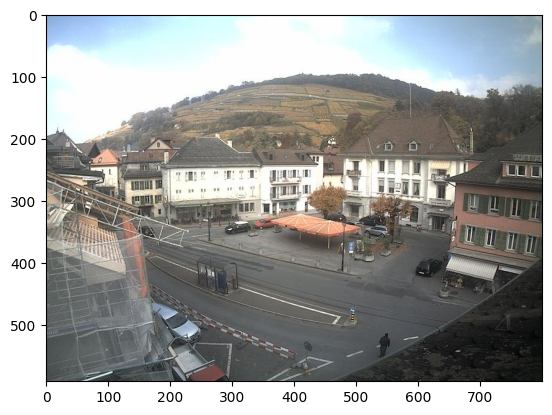

In [ ]:
random_img_viz(train_img)

Baris kode ini akan menjalankan fungsi random_img_viz yang telah Anda definisikan sebelumnya. Fungsi ini akan:

1. Memilih gambar secara acak dari dataset train_img.
2. Menampilkan gambar tersebut menggunakan matplotlib.pyplot.
3. Menampilkan informasi tentang gambar, termasuk dimensi (bentuk) dan labelnya.


**Langkah 3 - Pra Pengolahan Data**

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Fungsi standarized_input ini bertujuan untuk menstandarisasi ukuran gambar dengan mengubah ukuran setiap gambar menjadi lebar 1100 piksel dan tinggi 600 piksel.

- def standarized_input(image):: Mendefinisikan fungsi dengan nama standarized_input yang menerima satu argumen:
image: Data gambar yang akan diubah ukurannya.
- std_img = cv2.resize(image, (1100, 600)):
  - cv2.resize(image, (1100, 600)) mengubah ukuran gambar image menjadi lebar 1100 piksel dan tinggi 600 piksel menggunakan library OpenCV.
  - Gambar yang telah diubah ukurannya disimpan dalam variabel std_img.
- return std_img: Mengembalikan gambar yang telah diubah ukurannya.

Fungsi ini penting dalam pra-pemrosesan gambar untuk pembelajaran mesin. Dengan menstandarisasi ukuran gambar, Anda memastikan bahwa semua gambar memiliki dimensi yang sama, yang dapat meningkatkan kinerja model dan mengurangi kompleksitas komputasi.

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Fungsi label_encoder ini bertujuan untuk mengubah label teks ("day" atau "night") menjadi representasi numerik (1 untuk "day" dan 0 untuk "night"). Proses ini disebut encoding label dan merupakan langkah penting dalam mempersiapkan data untuk model pembelajaran mesin.

- def label_encoder(label):: Mendefinisikan fungsi dengan nama label_encoder yang menerima satu argumen --> label: Label teks yang akan diubah menjadi angka.
- num_val = 0: Menginisialisasi variabel num_val dengan nilai 0. Variabel ini akan menyimpan representasi numerik dari label.
- if(label == 'day'):: Memeriksa apakah label sama dengan "day".
- num_val = 1: Jika label adalah "day", maka num_val diubah menjadi 1.
- return num_val: Mengembalikan nilai num_val, yang merupakan representasi numerik dari label.

Fungsi ini sederhana namun penting dalam banyak tugas pembelajaran mesin. Model pembelajaran mesin biasanya bekerja dengan data numerik, sehingga label teks perlu diubah menjadi angka sebelum dapat digunakan untuk melatih model.

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Fungsi preprocess ini menggabungkan fungsi-fungsi yang telah didefinisikan sebelumnya (standarized_input dan label_encoder) untuk melakukan pra-pemrosesan pada daftar gambar dan label. Pra-pemrosesan ini meliputi standarisasi ukuran gambar dan encoding label.

- def preprocess(img_list):: Mendefinisikan fungsi dengan nama preprocess yang menerima satu argumen:
  - img_list: List yang berisi tupel gambar dan label.
- std_img_list = []: Menginisialisasi list kosong bernama std_img_list. List ini akan menyimpan gambar dan label yang telah diproses.
- for item in img_list:: Melakukan iterasi pada setiap elemen (tupel gambar dan label) dalam img_list.
- image = item[0]: Mengambil gambar dari tupel.
- label = item[1]: Mengambil label dari tupel.
- std_img = standarized_input(image): Memanggil fungsi standarized_input untuk menstandarisasi ukuran gambar.
- img_label = label_encoder(label): Memanggil fungsi label_encoder untuk mengubah label teks menjadi numerik.
- std_img_list.append((std_img, img_label)): Menambahkan gambar dan label yang telah diproses ke std_img_list sebagai tupel.
- return std_img_list: Mengembalikan list yang berisi gambar dan label yang telah diproses.

Fungsi ini menyederhanakan proses pra-pemrosesan data gambar dengan menggabungkan beberapa langkah menjadi satu fungsi. Ini meningkatkan efisiensi dan membuat kode lebih mudah dibaca dan dipelihara.

Lakukan pra pengolahan data pada data training.

In [ ]:
train_std_img_list = preprocess(train_img)

Baris kode ini memproses data gambar pelatihan (train_img) menggunakan fungsi preprocess yang telah Anda definisikan sebelumnya. Hasilnya disimpan dalam variabel train_std_img_list.

Fungsi preprocess, melakukan dua hal:

- Standarisasi ukuran gambar: Mengubah ukuran semua gambar menjadi lebar 1100 piksel dan tinggi 600 piksel.
- Encoding label: Mengubah label teks ("day" atau "night") menjadi representasi numerik (1 untuk "day" dan 0 untuk "night").

Oleh karena itu, train_std_img_list sekarang berisi daftar tupel, di mana setiap tupel terdiri dari:

- Gambar yang telah diubah ukurannya: Gambar yang telah distandarisasi ukurannya.
- Label numerik: Label yang telah diubah menjadi angka.

Data dalam train_std_img_list siap digunakan untuk melatih model pembelajaran mesin. Pra-pemrosesan ini membantu meningkatkan kinerja model dan menyederhanakan proses pelatihan.

Lakukan pengecekan ukuran gambar secara acak

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 173
(600, 1100, 3)


Kode ini memeriksa ukuran sebuah gambar yang dipilih secara acak dari daftar gambar yang telah diproses (train_std_img_list).

- pick_random = np.random.randint(0, len(train_std_img_list)): Memilih indeks acak dari daftar train_std_img_list.
- print(f'Image {pick_random}'): Menampilkan teks "Image" diikuti dengan indeks gambar yang dipilih.
- print(train_std_img_list[pick_random][0].shape):
  - Mengakses gambar pada indeks pick_random dari train_std_img_list.
  - Menampilkan dimensi (bentuk) gambar tersebut.

Karena gambar dalam train_std_img_list telah diubah ukurannya menggunakan fungsi preprocess, Anda akan melihat bahwa semua gambar sekarang memiliki dimensi yang sama, yaitu (600, 1100, 3). Ini menunjukkan bahwa standarisasi ukuran gambar telah berhasil dilakukan.

**WARNING!** Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.


Shape	: (600, 1100, 3)
Label	: 1


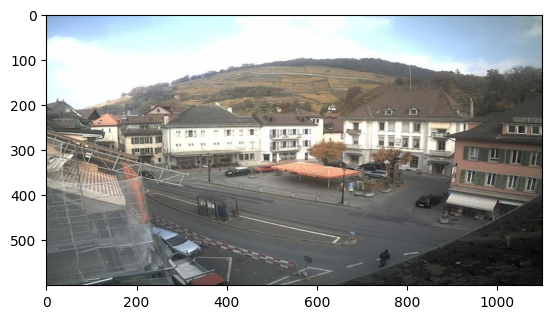

In [ ]:
random_img_viz(train_std_img_list)

Kode ini akan memvisualisasikan sebuah gambar yang dipilih secara acak dari daftar gambar yang telah diproses (train_std_img_list).

Fungsi random_img_viz akan:

- Memilih gambar dan label secara acak dari train_std_img_list.
- Menampilkan gambar menggunakan matplotlib.pyplot.
- Menampilkan dimensi dan label numerik dari gambar tersebut.


**Langkah 4 - Ekstraksi Fitur**

Selanjutnya, untuk dapat membedakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Fungsi avg_brightness ini menghitung rata-rata kecerahan gambar menggunakan color space HSV (Hue, Saturation, Value).

- def avg_brightness(image):: Mendefinisikan fungsi dengan nama avg_brightness yang menerima satu argumen:
  - image: Data gambar.
- img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV): Mengubah gambar dari color space RGB (Red, Green, Blue) ke HSV menggunakan fungsi cv2.cvtColor dari OpenCV.
- sum_brightness = np.sum(img_hsv[:,:,2]):
  - img_hsv[:,:,2] mengakses channel V (Value) dari gambar HSV, yang merepresentasikan kecerahan.
  - np.sum(...) menjumlahkan semua nilai piksel pada channel V.
- area = image.shape[0] * image.shape[1]: Menghitung luas gambar dengan mengalikan tinggi (image.shape[0]) dan lebar (image.shape[1]) gambar.
- avg = sum_brightness / area: Menghitung rata-rata kecerahan dengan membagi jumlah kecerahan (sum_brightness) dengan luas gambar (area).
- return avg: Mengembalikan nilai rata-rata kecerahan.

Fungsi ini berguna untuk mengekstrak fitur dari gambar berdasarkan kecerahannya. Fitur ini dapat digunakan untuk melatih model pembelajaran mesin, misalnya untuk membedakan antara gambar siang dan malam hari.

Lakukan pengecekan pada gambar secara acak. **INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!**

Image 181
Avg Brighness: 158.7342


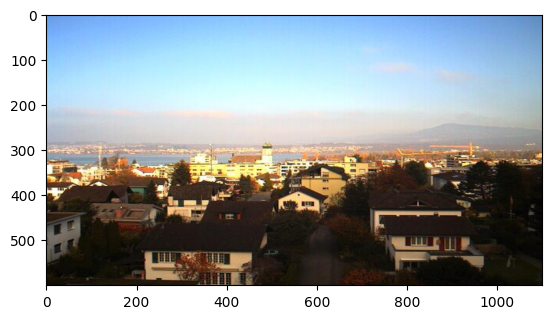

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

Kode ini menguji fungsi avg_brightness pada sebuah gambar yang dipilih secara acak dari daftar gambar yang telah diproses (train_std_img_list).

- rand_img = np.random.randint(0, len(train_std_img_list)): Memilih indeks acak dari daftar train_std_img_list.
- feature_img = train_std_img_list[rand_img][0]: Mengambil gambar pada indeks rand_img.
- avg_img = avg_brightness(feature_img): Memanggil fungsi avg_brightness untuk menghitung rata-rata kecerahan gambar.
- print(f'Image {rand_img}'): Menampilkan indeks gambar yang dipilih.
- print(f'Avg Brighness: {avg_img:.4f}'): Menampilkan rata-rata kecerahan gambar dengan format empat angka di belakang koma.
- plt.imshow(feature_img): Menampilkan gambar menggunakan matplotlib.pyplot.

Dengan menjalankan kode ini, dapat melihat gambar yang dipilih secara acak, beserta nilai rata-rata kecerahannya. Ini membantu untuk memahami bagaimana fungsi avg_brightness bekerja dan memvisualisasikan hubungan antara gambar dan nilai kecerahannya.

**Langkah 5 - Klasifikasi dengan Metode Threshold**


Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.


In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Fungsi predict_label memprediksi label gambar (siang atau malam) berdasarkan rata-rata kecerahannya dan threshold (ambang batas) yang ditentukan pengguna.

- def predict_label(img, threshold):: Mendefinisikan fungsi dengan nama predict_label yang menerima dua argumen:
  - img: Data gambar.
  - threshold: Nilai ambang batas kecerahan.
- avg = avg_brightness(img): Menghitung rata-rata kecerahan gambar menggunakan fungsi avg_brightness.
- pred = 0: Menginisialisasi variabel pred dengan nilai 0 (diasumsikan sebagai "malam").
- if avg > threshold:: Memeriksa apakah rata-rata kecerahan (avg) lebih besar dari threshold.
- pred = 1: Jika rata-rata kecerahan lebih besar dari threshold, maka pred diubah menjadi 1 (diprediksi sebagai "siang").
- return pred: Mengembalikan nilai prediksi (pred).

Fungsi ini merupakan bagian dari proses klasifikasi gambar. Dengan menetapkan threshold kecerahan, dapat mengklasifikasikan gambar menjadi dua kategori: "siang" jika rata-rata kecerahan di atas threshold, dan "malam" jika di bawah threshold.

Lakukan pengecekan prediksi secara acak pada data training

Image 1
Actual label: 0
Predicted label: 0


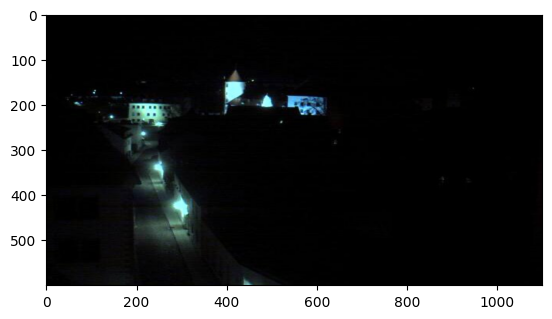

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

Kode ini menguji fungsi predict_label pada data pelatihan dengan memilih gambar secara acak dan membandingkan label prediksi dengan label sebenarnya.

- rand_img = np.random.randint(0, len(train_std_img_list)): Memilih gambar secara acak dari train_std_img_list.
- pred = predict_label(train_std_img_list[rand_img][0], threshold=120):
  - Memanggil fungsi predict_label untuk memprediksi label gambar.
  - threshold=120 digunakan sebagai ambang batas kecerahan.
- print(f'Image {rand_img}'): Menampilkan indeks gambar.
- print(f'Actual label: {train_std_img_list[rand_img][1]}') :Menampilkan label sebenarnya dari gambar.
- print(f'Predicted label: {pred}'): Menampilkan label yang diprediksi oleh fungsi predict_label.
- plt.imshow(train_std_img_list[rand_img][0]): Menampilkan gambar.

Dengan menjalankan kode ini, dapat melihat apakah model (fungsi predict_label) berhasil memprediksi label gambar dengan benar. Perhatikan bahwa akurasi prediksi bergantung pada threshold yang  ditetapkan.

**Langkah 6 - Evaluasi (Manual)**

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.




In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

 Fungsi ini menghitung akurasi model predict_label dengan membandingkan label prediksi dengan label sebenarnya untuk setiap gambar dalam daftar img_list.

- def evaluate(img_list, threshold):: Mendefinisikan fungsi evaluate yang menerima daftar gambar (img_list) dan nilai ambang batas (threshold) sebagai input.
- miss_labels = []: Membuat list kosong miss_labels untuk menyimpan gambar yang labelnya salah diprediksi.
- for file in img_list:: Melakukan iterasi pada setiap elemen (gambar dan label) dalam img_list.
- img = file[0]: Mengambil gambar dari elemen.
- label = file[1]: Mengambil label sebenarnya dari elemen.
- pred_label = predict_label(img, threshold): Memprediksi label gambar menggunakan fungsi predict_label dengan ambang batas yang ditentukan.
- if pred_label != label:: Memeriksa apakah label prediksi berbeda dengan label sebenarnya.
- miss_labels.append((img, pred_label, label)): Jika prediksi salah, tambahkan gambar, label prediksi, dan label sebenarnya ke miss_labels.
- total_img = len(img_list): Menghitung total gambar dalam img_list.
- corr_pred = total_img - len(miss_labels): Menghitung jumlah prediksi yang benar dengan mengurangkan jumlah prediksi yang salah dari total gambar.
- accuracy = corr_pred / total_img: Menghitung akurasi dengan membagi jumlah prediksi yang benar dengan total gambar.
- print(f'Accuracy: {accuracy:.4f}') : Mencetak hasil dari accuracy dengan format 4 angka dibelakang koma

Lakukan evaluasi pada data training dengan nilai ambang batas 120

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Kode ini mengevaluasi performa model (fungsi predict_label) pada data latih (train_std_img_list) menggunakan threshold 120.

- evaluate(train_std_img_list, threshold=120): Memanggil fungsi evaluate dengan dua argumen:
  - train_std_img_list: Daftar gambar dan label yang telah diproses dan akan digunakan untuk evaluasi.
  - threshold=120: Nilai ambang batas kecerahan yang digunakan dalam fungsi predict_label untuk memprediksi label gambar (siang atau malam).

Kode ini akan menampilkan akurasi model pada data latih. Akurasi menunjukkan seberapa baik model dalam memprediksi label gambar siang dan malam menggunakan threshold yang ditentukan.

Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


Kode ini mengevaluasi kinerja model pada data uji.

- test_img = load_dataset(test_dir): Memanggil fungsi load_dataset untuk membaca gambar dan label dari direktori test_dir dan menyimpannya dalam variabel test_img.
- test_std_img_list = preprocess(test_img): Memanggil fungsi preprocess untuk menstandarisasi ukuran gambar dan mengubah label menjadi numerik. Hasilnya disimpan dalam test_std_img_list.
- evaluate(test_std_img_list, threshold=120): Memanggil fungsi evaluate untuk menghitung akurasi model pada test_std_img_list menggunakan threshold 120.

Kode ini akan menampilkan akurasi model pada data uji. Akurasi ini menunjukkan seberapa baik model dalam menggeneralisasi ke data baru yang belum pernah dilihat

**Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM**

Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

**Langkah 4 alternatif - Membuat Feature Vectors**

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

extract_avg_bright_feature yang bertujuan untuk mengekstrak fitur rata-rata kecerahan dari setiap gambar dalam suatu daftar dan menyimpannya ke dalam DataFrame Pandas.

- def extract_avg_bright_feature(img_list): Baris ini mendefinisikan fungsi dengan nama extract_avg_bright_feature yang menerima satu argumen:
  - img_list: List yang berisi tuple-tuple, dimana setiap tuple terdiri dari data gambar dan labelnya.
- avg_list = [] Membuat list kosong dengan nama avg_list. List ini akan digunakan untuk menyimpan nilai rata-rata kecerahan dari setiap gambar.
- labels = [] Membuat list kosong dengan nama labels. List ini akan digunakan untuk menyimpan label yang sesuai dengan setiap gambar.
- for img in img_list: Memulai loop yang akan mengiterasi setiap tuple (gambar, label) dalam img_list.
- img_avg = avg_brightness(img[0])
  - img[0] mengakses elemen pertama dari tuple img, yaitu data gambar.
  - Memanggil fungsi avg_brightness dengan data gambar sebagai argumen. Fungsi avg_brightness (yang diasumsikan sudah didefinisikan sebelumnya) akan menghitung rata-rata kecerahan dari gambar tersebut.
  - Nilai rata-rata kecerahan disimpan dalam variabel img_avg.
- img_label = img[1] img[1] mengakses elemen kedua dari tuple img, yaitu label gambar. Label gambar disimpan dalam variabel img_label.
- avg_list.append(img_avg) Menambahkan nilai rata-rata kecerahan (img_avg) ke dalam list avg_list.
- labels.append(img_label) Menambahkan label gambar (img_label) ke dalam list labels.
- data = np.column_stack((avg_list, labels)) Menggabungkan list avg_list dan labels menjadi sebuah array NumPy 2 dimensi menggunakan fungsi np.column_stack. Setiap kolom dalam array ini akan merepresentasikan fitur rata-rata kecerahan dan labelnya.
- df = pd.DataFrame(data, columns=['AVG_BRIGHTNESS', 'LABEL'])
  - Membuat DataFrame Pandas (df) dari array NumPy data.
  - columns=['AVG_BRIGHTNESS', 'LABEL'] memberi nama kolom pada DataFrame:
    - AVG_BRIGHTNESS: Kolom untuk nilai rata-rata kecerahan.
    - LABEL: Kolom untuk label gambar.
- return df Mengembalikan DataFrame Pandas df yang berisi fitur rata-rata kecerahan dan labelnya.

Fungsi ini berguna untuk mengekstrak fitur dari gambar dan menyusunnya dalam format tabular (DataFrame) yang dapat digunakan untuk analisis data

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,48.420536,0.0
1,8.191894,0.0
2,47.273102,0.0
3,48.313274,0.0
4,48.713038,0.0


Kode ini mengekstrak fitur rata-rata kecerahan dari data latih yang telah diproses (train_std_img_list) dan menampilkan bentuk serta lima baris pertama dari DataFrame yang dihasilkan.

- train_avg_img = extract_avg_bright_feature(train_std_img_list):

  - Memanggil fungsi extract_avg_bright_feature dengan data latih (train_std_img_list) sebagai argumen.
  - Fungsi ini menghitung rata-rata kecerahan untuk setiap gambar dan membuat DataFrame Pandas dengan dua kolom: AVG_BRIGHTNESS (rata-rata kecerahan) dan LABEL (label gambar).
  - DataFrame yang dihasilkan disimpan dalam variabel train_avg_img.
- print(f'Shape: {train_avg_img.shape}'): Menampilkan bentuk (dimensi) DataFrame train_avg_img. Outputnya akan menunjukkan jumlah baris (gambar) dan kolom (fitur dan label) dalam DataFrame.
- train_avg_img.head(): Menampilkan lima baris pertama dari DataFrame train_avg_img. Ini memberikan gambaran sekilas tentang data, termasuk nilai rata-rata kecerahan dan label untuk beberapa gambar pertama.


In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,128.156468,1.0
1,149.970523,1.0
2,150.833567,1.0
3,191.237441,1.0
4,152.010606,1.0


Kode ini melakukan proses yang sama seperti sebelumnya, tetapi pada data uji (test_std_img_list).

- test_avg_img = extract_avg_bright_feature(test_std_img_list):

  - Memanggil fungsi extract_avg_bright_feature dengan data uji (test_std_img_list).
  - Fungsi ini akan menghitung rata-rata kecerahan setiap gambar dalam data uji dan membuat DataFrame dengan kolom AVG_BRIGHTNESS dan LABEL.
  DataFrame yang dihasilkan disimpan dalam variabel test_avg_img.
- print(f'Shape: {test_avg_img.shape}') : Menampilkan dimensi DataFrame test_avg_img (jumlah baris dan kolom).
- test_avg_img.head(): Menampilkan lima baris pertama DataFrame test_avg_img untuk melihat contoh data.


**Langkah 5 alternatif**

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

Kode ini mempersiapkan data dan melatih model Support Vector Machine (SVM) untuk klasifikasi gambar siang dan malam.

- from sklearn.svm import SVC: Mengimpor kelas SVC dari library scikit-learn (sklearn). Kelas ini digunakan untuk membuat model SVM.
- X_train = train_avg_img.iloc[:,0].values.reshape(-1,1):
  - train_avg_img.iloc[:,0] memilih semua baris (:) dan kolom pertama (0) dari DataFrame train_avg_img, yaitu kolom AVG_BRIGHTNESS yang berisi fitur rata-rata kecerahan.
  - .values mengambil nilai dari kolom tersebut sebagai array NumPy.
  - .reshape(-1,1) mengubah bentuk array menjadi array 2 dimensi dengan satu kolom. Ini diperlukan untuk model SVM di scikit-learn.
  - Data fitur latih disimpan dalam variabel X_train.
- y_train = train_avg_img.iloc[:,1]:
  - train_avg_img.iloc[:,1] memilih semua baris dan kolom kedua (1) dari DataFrame train_avg_img, yaitu kolom LABEL yang berisi label gambar.
  - Label latih disimpan dalam variabel y_train.
- X_test = test_avg_img.iloc[:,0].values.reshape(-1,1): Melakukan hal yang sama seperti langkah 2, tetapi pada DataFrame test_avg_img untuk mendapatkan data fitur uji (X_test).
- y_test = test_avg_img.iloc[:,1]: Melakukan hal yang sama seperti langkah 3, tetapi pada DataFrame test_avg_img untuk mendapatkan label uji (y_test).
- model = SVC():Membuat objek model SVM (SVC) dan menyimpannya dalam variabel model.
- model.fit(X_train, y_train): Melatih model SVM menggunakan data fitur latih (X_train) dan label latih (y_train).

**Langkah 6 alternatif**

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


Kode ini mengevaluasi performa model Support Vector Machine (SVM) yang telah Anda latih sebelumnya dengan menghitung akurasinya pada data latih dan data uji.

- from sklearn.metrics import accuracy_score: Mengimpor fungsi accuracy_score dari library scikit-learn (sklearn). Fungsi ini digunakan untuk menghitung akurasi model klasifikasi.

- y_train_pred = model.predict(X_train):
  - Menggunakan model SVM yang telah dilatih (model) untuk memprediksi label pada data latih (X_train).
  - Hasil prediksi (label yang diprediksi) disimpan dalam variabel y_train_pred.
- acc_train = accuracy_score(y_train, y_train_pred):
  - Memanggil fungsi accuracy_score untuk menghitung akurasi model pada data latih.
  - Fungsi ini membandingkan label yang diprediksi (y_train_pred) dengan label sebenarnya (y_train).
  - Nilai akurasi disimpan dalam variabel acc_train.
- y_test_pred = model.predict(X_test):
  - Menggunakan model SVM untuk memprediksi label pada data uji (X_test).
  - Hasil prediksi disimpan dalam variabel y_test_pred.
- acc_test = accuracy_score(y_test, y_test_pred):
  - Menghitung akurasi model pada data uji dengan membandingkan label prediksi (y_test_pred) dengan label sebenarnya (y_test).
  - Nilai akurasi disimpan dalam variabel acc_test.
- print(f'Accuracy on train: {acc_train}'): Menampilkan akurasi model pada data latih ke konsol.
- print(f'Accuracy on test: {acc_test}'): Menampilkan akurasi model pada data uji ke konsol.

Kode ini bertujuan untuk mengukur seberapa baik model SVM dalam melakukan klasifikasi pada data yang belum pernah dilihat sebelumnya (data uji). Akurasi pada data uji merupakan indikator yang lebih realistis tentang kinerja model di dunia nyata.

# Tugas 1 (Opsional)

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  - Menggunakan data spam.csv
  - Fitur CountVectorizer dengan mengaktifkan stop_words
  - Evaluasi hasilnya
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  - Menggunakan data spam.csv
  - Fitur TF-IDF dengan mengaktifkan stop_words
  - Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
  - Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

1.

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/machine learning/voice.csv'
voice_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
voice_data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Kode tersebut mengimpor library Pandas dan memuat dataset dari Google Drive, lalu menampilkan beberapa baris pertama.

- import pandas as pd: Mengimpor library Pandas dan memberinya alias pd untuk penggunaan yang lebih singkat.
- file_path = '/content/drive/MyDrive/machine learning/voice.csv': Mendefinisikan variabel file_path yang menyimpan lokasi file CSV di Google Drive.
- voice_data = pd.read_csv(file_path): Membaca file CSV yang ditentukan oleh file_path menggunakan fungsi read_csv dari Pandas dan menyimpannya dalam variabel voice_data sebagai DataFrame.
- voice_data.head(): Menampilkan 5 baris pertama dari DataFrame voice_data untuk melihat struktur dan isi dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Preprocessing: Convert the 'label' column to numerical values
label_encoder = LabelEncoder()
voice_data['label'] = label_encoder.fit_transform(voice_data['label'])  # male=1, female=0

# Separate features (X) and target (y)
X = voice_data.drop(columns=['label'])
y = voice_data['label']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Initialize the SVM model
svm_model = SVC(kernel='linear')  # Using a linear kernel for simplicity

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.9200841219768665

Kode di atas menggunakan Support Vector Machine (SVM) dengan kernel linear untuk membangun model klasifikasi pada dataset voice_data. Berikut adalah penjelasan dari setiap bagian kode:

1. Mengimpor Library
  - train_test_split: Digunakan untuk membagi dataset menjadi data training dan testing.
  - SVC: Kelas yang digunakan untuk mengimplementasikan Support Vector Machine dengan kernel tertentu.
  - LabelEncoder: Digunakan untuk mengubah label kategorikal (seperti "male" dan "female") menjadi bentuk numerik.
  - accuracy_score: Metrik untuk mengevaluasi akurasi model, dengan menghitung persentase prediksi yang benar.
2. label_encoder = LabelEncoder()
voice_data['label'] = label_encoder.fit_transform(voice_data['label'])  # male=1, female=0
  - LabelEncoder digunakan untuk mengonversi label dalam kolom label dari kategorikal menjadi numerik. Dalam hal ini:
    - male diubah menjadi 1.
    - female diubah menjadi 0.
3. X = voice_data.drop(columns=['label']), y = voice_data['label']
  - X: Fitur-fitur input, yaitu semua kolom selain kolom label.
  - y: Label atau target, yaitu kolom label yang sudah diubah menjadi bentuk numerik.
4. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
  - Dataset dibagi menjadi data training dan testing.
  - X_train, y_train: Data yang digunakan untuk melatih model.
  - X_test, y_test: Data yang digunakan untuk menguji model.
  - test_size=0.3: Artinya 30% dari data digunakan untuk pengujian (testing), sementara 70% untuk pelatihan (training).
  - random_state=30: Menetapkan seed untuk memastikan pembagian data konsisten setiap kali kode dijalankan.
5. svm_model = SVC(kernel='linear')  # Using a linear kernel for simplicity
  - SVC(kernel='linear'): Membuat model SVM dengan kernel linear, yang cocok untuk data yang dapat dipisahkan secara linear.
6. svm_model.fit(X_train, y_train)
  - fit(): Melatih model SVM menggunakan data training (X_train dan y_train), di mana model belajar memisahkan data berdasarkan fitur suara untuk mengklasifikasikannya ke dalam kategori "male" atau "female".
7. y_pred = svm_model.predict(X_test)
  - predict(): Model membuat prediksi berdasarkan data testing (X_test). Hasil prediksi disimpan dalam y_pred.
8. accuracy = accuracy_score(y_test, y_pred)
  - accuracy_score(): Menghitung akurasi model dengan membandingkan prediksi model (y_pred) dengan label asli (y_test). Akurasi adalah persentase prediksi yang benar.
9. accuracy --> Menampilkan akurasi dari model SVM setelah diuji pada data testing.

Kesimpulan:
Kode ini menggunakan SVM dengan kernel linear untuk membangun model klasifikasi yang memprediksi apakah suara berasal dari pria (male) atau wanita (female).
Akurasi model dihitung berdasarkan performa model pada data testing, yang menunjukkan seberapa baik model memprediksi label suara.

2

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Data
data = pd.read_csv('/content/drive/MyDrive/machine learning/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Kode di atas mengimpor library yang dibutuhkan untuk pemrosesan teks dan membangun model Naive Bayes, kemudian memuat dataset spam dari Google Drive.

- from sklearn.feature_extraction.text import CountVectorizer: Mengimpor CountVectorizer dari scikit-learn, digunakan untuk mengubah teks menjadi representasi numerik (vektor fitur) berdasarkan jumlah kemunculan kata.

- from sklearn.naive_bayes import MultinomialNB: Mengimpor MultinomialNB, yaitu kelas untuk membuat model Naive Bayes Multinomial, yang cocok untuk data diskrit seperti jumlah kata.

- from sklearn.metrics import accuracy_score, classification_report, confusion_matrix: Mengimpor metrik evaluasi model, yaitu:

  - accuracy_score: Menghitung akurasi model.
  - classification_report: Menampilkan laporan presisi, recall, dan F1-score.
  - confusion_matrix: Membuat matriks konfusi untuk visualisasi performa.
- data = pd.read_csv('/content/drive/MyDrive/machine learning/spam.csv', encoding='latin-1'):
  - Membaca file CSV "spam.csv" dari Google Drive menggunakan Pandas dan menyimpannya dalam DataFrame bernama data.
  - encoding='latin-1' menangani karakter khusus yang mungkin ada dalam dataset.
- data.head(): Menampilkan 5 baris pertama DataFrame data untuk melihat struktur dan contoh data spam.

In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
data = data.drop(data.iloc[:,2:], axis=1)

# Cek data
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Kode tersebut menghapus 3 kolom terakhir dari DataFrame data menggunakan iloc dan menampilkan 5 baris pertama untuk verifikasi.

- data = data.drop(data.iloc[:,2:], axis=1):

  - data.iloc[:,2:]: Memilih semua baris (:) dan kolom mulai dari indeks 2 hingga akhir (2:) menggunakan iloc.
  - data.drop(...): Menghapus kolom yang dipilih dari DataFrame data.
  - axis=1: Menentukan bahwa operasi dilakukan pada kolom (1 untuk kolom, 0 untuk baris).
- data.head(): Menampilkan 5 baris pertama dari DataFrame data yang sudah diperbarui untuk memastikan 3 kolom terakhir telah dihapus.

In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
data = data.rename(columns=new_cols)

# cek data
data.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Kode ini mengganti nama kolom 'v1' menjadi 'Labels' dan 'v2' menjadi 'SMS' dalam DataFrame data, lalu menampilkan 5 baris pertama untuk melihat perubahan.

- new_cols = {'v1': 'Labels', 'v2': 'SMS'}: Membuat dictionary new_cols untuk memetakan nama kolom lama ('v1' dan 'v2') ke nama kolom baru ('Labels' dan 'SMS').

- data = data.rename(columns=new_cols): Menggunakan fungsi rename dengan argumen columns=new_cols untuk mengganti nama kolom dalam DataFrame data berdasarkan pemetaan di new_cols.

- data.head(): Menampilkan 5 baris pertama DataFrame data setelah penggantian nama kolom untuk memverifikasi perubahan.

In [ ]:
# Persiapan Data
X = data['SMS'].values
y = data['Labels'].values

# Pisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan konfigurasi CountVectorizer dengan stop_words
count_vectorizer = CountVectorizer(stop_words='english')

# Transformasi data teks menjadi vektor fitur
X_train_vectorized = count_vectorizer.fit_transform(X_train)
X_test_vectorized = count_vectorizer.transform(X_test)

# Buat dan Latih Model Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Evaluasi Model
y_pred = nb_model.predict(X_test_vectorized)

1. X = data['SMS'].values, y = data['Labels'].values
  - X: Berisi data teks dari kolom SMS, yang digunakan sebagai fitur.
  - y: Berisi label dari kolom Labels, yang digunakan sebagai target.
2. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  - Dataset dibagi menjadi data pelatihan (80%) dan data pengujian (20%).
  - random_state=42: Menetapkan seed untuk memastikan pembagian data konsisten setiap kali kode dijalankan.
3. count_vectorizer = CountVectorizer(stop_words='english')
  - CountVectorizer digunakan untuk mengubah teks menjadi vektor fitur berbasis frekuensi kata.
  - stop_words='english': Mengaktifkan stop words dalam bahasa Inggris, artinya kata-kata umum seperti "the", "is", "and" akan diabaikan dalam proses vektorisasi, yang membantu meningkatkan performa model.
4. X_train_vectorized = count_vectorizer.fit_transform(X_train)
X_test_vectorized = count_vectorizer.transform(X_test)
  - fit_transform(): Untuk data pelatihan, CountVectorizer melakukan dua hal: menyesuaikan (fit) model vektorisasi berdasarkan frekuensi kata pada teks, lalu mentransformasi data teks menjadi representasi numerik.
  - transform(): Untuk data pengujian, model CountVectorizer yang sudah dilatih pada data pelatihan digunakan untuk mentransformasi teks menjadi vektor fitur.
5. nb_model = MultinomialNB(), nb_model.fit(X_train_vectorized, y_train)
  - MultinomialNB(): Membuat model Naive Bayes multinasional yang sangat cocok untuk masalah klasifikasi teks, di mana fitur berbasis frekuensi kata lebih umum digunakan.
  - fit(): Melatih model Naive Bayes menggunakan data pelatihan yang sudah diubah menjadi vektor fitur (X_train_vectorized) dan labelnya (y_train).
6. y_pred = nb_model.predict(X_test_vectorized)
  - predict(): Model yang sudah dilatih membuat prediksi pada data pengujian (X_test_vectorized), menghasilkan label prediksi (y_pred) berdasarkan pesan teks.

In [ ]:
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

# Tampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

# Tampilkan matriks kebingungan
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Akurasi: 0.9838565022421525
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[959   6]
 [ 12 138]]


Kode ini mengevaluasi performa model dengan menghitung akurasi, menampilkan laporan klasifikasi, dan mencetak matriks kebingungan.

- accuracy = accuracy_score(y_test, y_pred): Menghitung akurasi model menggunakan accuracy_score dari scikit-learn.

  - y_test: Label sebenarnya dari data uji.
  - y_pred: Label yang diprediksi oleh model.
  - Hasilnya disimpan dalam variabel accuracy.
- print(f'Akurasi: {accuracy}'): Menampilkan nilai akurasi yang telah dihitung.

- print(classification_report(y_test, y_pred)): Menampilkan laporan klasifikasi yang berisi precision, recall, F1-score, dan support untuk setiap kelas. Laporan ini memberikan gambaran detail tentang performa model pada setiap kelas.

- confusion = confusion_matrix(y_test, y_pred): Menghitung matriks kebingungan menggunakan confusion_matrix. Matriks ini menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.

- print('Confusion Matrix:') dan print(confusion): Menampilkan matriks kebingungan yang telah dihitung.

3

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Persiapan Data
X = data['SMS']
y = data['Labels']

# Pisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan konfigurasi TF-IDF Vectorizer dengan stop_words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transformasi data teks menjadi vektor fitur TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Buat dan Latih Model Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Evaluasi Model
y_pred = nb_model.predict(X_test_tfidf)

1. X = data['SMS'], y = data['Labels']
  - X: Mengambil kolom SMS yang berisi teks pesan.
  - y: Mengambil kolom Labels yang berisi label target, seperti "ham" atau "spam".
2. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  - Dataset dibagi menjadi data pelatihan dan pengujian, di mana 80% digunakan untuk melatih model dan 20% digunakan untuk pengujian model.
  - random_state=42: Menjamin hasil pembagian data yang konsisten setiap kali dijalankan.
3. tfidf_vectorizer = TfidfVectorizer(stop_words='english')
  - TfidfVectorizer digunakan untuk mengonversi teks menjadi vektor fitur berdasarkan Term Frequency-Inverse Document Frequency (TF-IDF).
  - stop_words='english': Menghapus kata-kata umum (seperti "the", "is") dari data teks, yang membantu fokus pada kata-kata penting untuk klasifikasi.
4. X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
  - fit_transform(): Pada data pelatihan, TfidfVectorizer mempelajari frekuensi kata dan mentransformasikan teks menjadi representasi vektor TF-IDF.
  - transform(): Pada data pengujian, model TF-IDF yang sudah dilatih digunakan untuk mentransformasikan teks menjadi fitur numerik.
5. nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
  - MultinomialNB(): Membuat model Naive Bayes multinomial yang sesuai dengan distribusi frekuensi kata seperti yang dihasilkan oleh TF-IDF.
  - fit(): Melatih model menggunakan data pelatihan yang sudah diubah menjadi vektor TF-IDF dan label target.
6. y_pred = nb_model.predict(X_test_tfidf)
  - predict(): Model membuat prediksi berdasarkan data pengujian yang sudah diubah menjadi fitur TF-IDF, menghasilkan prediksi label.

In [ ]:
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi (TF-IDF): {accuracy}')

# Tampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

# Tampilkan matriks kebingungan
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix (TF-IDF):')
print(confusion)

Akurasi (TF-IDF): 0.9668161434977578
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix (TF-IDF):
[[965   0]
 [ 37 113]]


Kode ini mirip dengan yang sebelumnya, tetapi dengan tambahan keterangan "(TF-IDF)" pada output. Ini menunjukkan bahwa kode dieksekusi setelah model dengan fitur TF-IDF dilatih dan prediksi dilakukan.

- accuracy = accuracy_score(y_test, y_pred): Menghitung akurasi model (dengan TF-IDF) menggunakan accuracy_score.
- print(f'Akurasi (TF-IDF): {accuracy}'): Menampilkan nilai akurasi dengan keterangan "(TF-IDF)".
- print(classification_report(y_test, y_pred)): Menampilkan laporan klasifikasi untuk model dengan TF-IDF.
- confusion = confusion_matrix(y_test, y_pred): Menghitung matriks kebingungan untuk model dengan TF-IDF.
- print('Confusion Matrix (TF-IDF):') dan print(confusion): Menampilkan matriks kebingungan dengan keterangan "(TF-IDF)".

Kesimpulan: Kode ini mengevaluasi dan menampilkan metrik performa model yang menggunakan fitur TF-IDF, memberikan informasi tentang akurasi, presisi, recall, F1-score, dan matriks kebingungan.

**Kesimpulan**
Setelah dibandingkan fitur CountVectorizer lebih baik dariapada fitur TF-IDF. Fitur CountVectorizer menghasilkan akurasi sebesar 0,98 sedangkan TF-IDF menghasilkan akurasi sebesar 0,96. Meskipun begitu selisih diantara kedua fitur tidak terlalu besar.

- CountVectorizer: Model ini berfokus pada frekuensi kemunculan kata, yang mungkin lebih cocok jika kata-kata penting sering muncul dalam data.
- TF-IDF Vectorizer: Model ini mempertimbangkan pentingnya suatu kata relatif terhadap semua dokumen, sehingga mungkin lebih efektif untuk dataset dengan banyak kata umum atau dokumen panjang.

# Tugas 2

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [ ]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

Kode tersebut mengimpor beberapa library yang umum digunakan dalam machine learning, khususnya untuk tugas-tugas yang melibatkan pengolahan gambar dan klasifikasi dengan Support Vector Machine (SVM). Mari kita bahas setiap library:

- os: Modul untuk berinteraksi dengan sistem operasi. Berguna untuk operasi seperti mengelola file dan direktori (misalnya, membaca file gambar dari direktori).
- cv2: Modul OpenCV untuk Python. Digunakan untuk operasi pengolahan gambar, seperti membaca gambar, mengubah ukuran, dan ekstraksi fitur.
- numpy (np): Modul untuk komputasi numerik di Python. Menyediakan struktur data array yang efisien dan fungsi matematika untuk operasi pada array, yang sering digunakan dalam pengolahan gambar dan machine learning.
- sklearn.svm (SVC): Modul dari Scikit-learn yang menyediakan implementasi Support Vector Classifier (SVC). SVC adalah algoritma machine learning yang powerful untuk klasifikasi.
- sklearn.preprocessing (StandardScaler): Modul untuk pra-pemrosesan data. StandardScaler digunakan untuk standarisasi fitur dengan mengubah data sehingga memiliki rata-rata 0 dan deviasi standar 1. Hal ini dapat meningkatkan performa model machine learning.
- sklearn.metrics (accuracy_score, classification_report): Modul untuk evaluasi model. accuracy_score digunakan untuk menghitung akurasi model, dan classification_report memberikan laporan yang lebih detail tentang performa klasifikasi, termasuk precision, recall, dan F1-score.
- sklearn.model_selection (train_test_split): Modul untuk membagi data menjadi set training dan testing. train_test_split membagi data secara acak menjadi dua bagian: satu untuk melatih model dan yang lainnya untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya.

In [ ]:
def extract_histogram(image, bins=(8, 8, 8)):
    # Konversi gambar ke ruang warna HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Hitung histogram dalam 3 channel (H, S, V)
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    # Normalisasi histogram
    hist = cv2.normalize(hist, hist).flatten()
    return hist

Fungsi extract_histogram bertujuan untuk mengekstrak fitur histogram dari sebuah gambar. Fitur histogram merupakan representasi distribusi warna dalam gambar, yang dapat digunakan untuk berbagai tugas pengolahan citra dan visi komputer seperti klasifikasi objek, pencarian citra, dan segmentasi.

- def extract_histogram(image, bins=(8, 8, 8))::
  - Mendefinisikan fungsi dengan nama extract_histogram yang menerima dua parameter:
    - image: Gambar input yang akan diekstrak histogramnya.
    - bins: Jumlah bin (rentang nilai) untuk setiap channel warna. Defaultnya adalah (8, 8, 8), yang berarti 8 bin untuk Hue (H), 8 bin untuk Saturation (S), dan 8 bin untuk Value (V).
- hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)::
  - Mengubah gambar dari ruang warna BGR (Blue-Green-Red) ke ruang warna HSV (Hue-Saturation-Value).
  - Ruang warna HSV seringkali lebih baik dalam merepresentasikan warna dalam cara yang lebih intuitif bagi manusia, karena memisahkan informasi warna (Hue), intensitas warna (Saturation), dan kecerahan (Value).
- hist = cv2.calcHist([hsv_image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])::
  - Menghitung histogram dari gambar HSV.
  - Parameter [0, 1, 2] menunjukkan bahwa histogram dihitung untuk ketiga channel (H, S, V).
  - None menunjukkan bahwa tidak ada mask yang digunakan.
  - bins adalah jumlah bin yang telah didefinisikan sebelumnya.
  - [0, 256, 0, 256, 0, 256] mendefinisikan rentang nilai untuk setiap channel (0-255).
- hist = cv2.normalize(hist, hist).flatten()::
  - Menormalisasi histogram sehingga nilainya berada dalam rentang 0 hingga 1.
  - Normalisasi membantu dalam membandingkan histogram dari gambar yang berbeda.
  - flatten() mengubah histogram menjadi array satu dimensi.
- return hist::
  - Mengembalikan histogram yang telah dinormalisasi dan diubah menjadi array satu dimensi.
  
Fungsi ini menghasilkan fitur histogram yang dapat digunakan sebagai input untuk algoritma machine learning seperti SVM untuk klasifikasi citra berdasarkan warna.

In [ ]:
def load_dataset(directory):
    data = []
    labels = []

    # Loop setiap folder (kelas) di direktori
    for class_label in os.listdir(directory):
        class_dir = os.path.join(directory, class_label)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                image = cv2.imread(image_path)

                if image is not None:
                    # Ekstrak fitur histogram dari gambar
                    hist = extract_histogram(image)
                    data.append(hist)
                    labels.append(class_label)

    return np.array(data), np.array(labels)

Kode di atas adalah sebuah fungsi Python yang digunakan untuk memuat dataset gambar dari sebuah direktori, mengonversinya menjadi data yang dapat digunakan untuk pelatihan model machine learning, dan mengelompokkan setiap gambar berdasarkan kelasnya.

- def load_dataset(directory): Fungsi ini mendefinisikan load_dataset, yang menerima satu parameter directory, yaitu direktori utama tempat dataset tersimpan.
- data = [] --> Inisialisasi list kosong untuk menyimpan fitur data dari setiap gambar. Nantinya, fitur ini akan diekstrak dari gambar dalam bentuk histogram.
- labels = [] -->Inisialisasi list kosong untuk menyimpan label (kelas) dari setiap gambar.
- for class_label in os.listdir(directory): --> Melakukan iterasi pada setiap folder dalam direktori utama. Folder tersebut mewakili setiap kelas
- class_dir = os.path.join(directory, class_label) --> Menggabungkan path direktori utama dengan nama folder (kelas), sehingga diperoleh path lengkap untuk setiap kelas.
- if os.path.isdir(class_dir): -->Mengecek apakah path tersebut merupakan sebuah direktori. Jika ya, maka itu berarti path tersebut adalah folder kelas.
- for image_name in os.listdir(class_dir): --> Melakukan iterasi pada setiap file gambar yang ada di dalam folder kelas tersebut.
- image_path = os.path.join(class_dir, image_name) --> Menggabungkan path direktori kelas dengan nama gambar, sehingga diperoleh path lengkap untuk gambar tersebut.
- image = cv2.imread(image_path) --> Membaca gambar menggunakan OpenCV (cv2.imread). cv2 adalah modul OpenCV yang digunakan untuk pengolahan gambar. imread akan memuat gambar dari image_path.
- if image is not None: --> Mengecek apakah gambar berhasil dimuat. Kadang-kadang, ada kemungkinan file yang tidak dapat dibaca sebagai gambar, jadi pengecekan ini diperlukan.
- hist = extract_histogram(image) --> Menghasilkan fitur dari gambar dengan mengekstrak histogram dari gambar tersebut. Histogram adalah representasi distribusi intensitas warna atau cahaya dalam gambar. Fungsi extract_histogram(image) tidak dijelaskan di sini, tapi diasumsikan berfungsi untuk mendapatkan histogram dari gambar.
- data.append(hist) --> Menambahkan fitur histogram gambar ke list data.
- labels.append(class_label) --> Menambahkan label kelas yang sesuai (nama folder tempat gambar berada) ke list labels.
- return np.array(data), np.array(labels) --> Setelah semua gambar diproses, list data dan labels diubah menjadi array NumPy (np.array) untuk memudahkan penggunaan dalam machine learning. data berisi fitur histogram dari semua gambar, dan labels berisi kelas yang sesuai untuk setiap gambar.

Fungsi ini berguna untuk mempersiapkan dataset gambar dengan label yang terstruktur untuk digunakan dalam proses training model machine learning. Fitur yang diekstrak (histogram) bisa digunakan dalam algoritma klasifikasi gambar. Histogram digunakan untuk merangkum informasi distribusi warna pada gambar yang nantinya akan digunakan sebagai input dalam model.


In [ ]:
train_dir = "/content/drive/MyDrive/machine learning/images/training"
test_dir = "/content/drive/MyDrive/machine learning/images/test"

# Load data
X_train, y_train = load_dataset(train_dir)
X_test, y_test = load_dataset(test_dir)


Proses pemuatan data gambar dari direktori training dan testing untuk digunakan dalam machine learning.

- train_dir = "/content/drive/MyDrive/machine learning/images/training":
  - Menetapkan variabel train_dir ke path direktori tempat data gambar training disimpan. Path ini mengarah ke folder "training" di dalam "images" di Google Drive Anda.
- test_dir = "/content/drive/MyDrive/machine learning/images/test":
  - Menetapkan variabel test_dir ke path direktori tempat data gambar testing disimpan. Path ini mengarah ke folder "test" di dalam "images" di Google Drive Anda.
- X_train, y_train = load_dataset(train_dir):
  - Memanggil fungsi load_dataset  dengan path direktori training (train_dir) sebagai argumen.
  - Fungsi load_dataset kemungkinan besar memuat gambar dari direktori yang diberikan dan mengembalikan dua nilai:
    - X_train: Data gambar training, kemungkinan berupa array NumPy yang berisi representasi numerik dari gambar.
    - y_train: Label kelas yang sesuai dengan setiap gambar training.
- X_test, y_test = load_dataset(test_dir):
  - Serupa dengan baris sebelumnya, tetapi memuat data gambar dan label dari direktori testing (test_dir).
  - Menghasilkan X_test (data gambar testing) dan y_test (label kelas testing).

Kode ini merupakan langkah umum dalam machine learning untuk mempersiapkan data sebelum melatih model. Data training digunakan untuk melatih model, sedangkan data testing digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya.



In [ ]:
scaler = StandardScaler()

# Fit dan transform data training
X_train = scaler.fit_transform(X_train)

# Transform data testing
X_test = scaler.transform(X_test)

Proses standarisasi data menggunakan StandardScaler dari Scikit-learn. Standarisasi adalah teknik pra-pemrosesan data yang umum digunakan dalam machine learning untuk mengubah data sehingga memiliki rata-rata 0 dan deviasi standar 1.

- scaler = StandardScaler():
  - Membuat objek StandardScaler. Objek ini akan digunakan untuk melakukan standarisasi data.
- X_train = scaler.fit_transform(X_train):
  - Melakukan dua operasi pada data training (X_train):
    - fit: Menghitung rata-rata dan deviasi standar dari setiap fitur dalam data training. Informasi ini disimpan dalam objek scaler.
    - transform: Mentransformasi data training menggunakan rata-rata dan deviasi standar yang telah dihitung. Setiap fitur di data training akan dikurangi dengan rata-ratanya dan dibagi dengan deviasi standarnya.
- X_test = scaler.transform(X_test):
  - Mentransformasi data testing (X_test) menggunakan rata-rata dan deviasi standar yang telah dihitung dari data training. Penting untuk tidak melakukan fit pada data testing, karena kita ingin menghindari kebocoran informasi dari data testing ke model.

Dengan melakukan standarisasi, memastikan bahwa semua fitur memiliki bobot yang sama dalam proses training model dan dapat meningkatkan performa model secara keseluruhan.

In [ ]:
# Inisialisasi model SVM dengan kernel linear
model = SVC(kernel='linear')

# Latih model dengan data training
model.fit(X_train, y_train)

SVC(kernel='linear')

Kode tersebut mendefinisikan dan melatih model Support Vector Classifier (SVC) dengan kernel linear. SVC adalah algoritma machine learning yang digunakan untuk klasifikasi. Kernel linear digunakan ketika data dapat dipisahkan secara linear, artinya dapat dipisahkan dengan garis lurus (dalam dua dimensi) atau hyperplane (dalam dimensi yang lebih tinggi).

- model = SVC(kernel='linear'):
  - Membuat objek model SVC dengan kernel linear.
  - kernel='linear' menentukan jenis kernel yang digunakan. Anda dapat mengganti ini dengan kernel lain seperti 'rbf' (Radial Basis Function) jika data Anda tidak terpisah secara linear.
- model.fit(X_train, y_train):
  - Melatih model SVC menggunakan data training (X_train) dan label kelas (y_train).
  
Proses training ini akan mencari hyperplane optimal yang memisahkan data ke dalam kelas yang berbeda dengan memaksimalkan margin.

In [ ]:
# Prediksi data testing
y_pred = model.predict(X_test)

# Tampilkan akurasi dan laporan klasifikasi
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Akurasi: 0.9625
              precision    recall  f1-score   support

         day       0.96      0.96      0.96        80
       night       0.96      0.96      0.96        80

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160



Kode tersebut menggunakan model SVM yang telah dilatih untuk melakukan prediksi pada data testing dan kemudian mengevaluasi performa model dengan menampilkan akurasi dan laporan klasifikasi.

- y_pred = model.predict(X_test):
  - Menggunakan model SVM yang telah dilatih (model) untuk melakukan prediksi pada data testing (X_test).
  - Hasil prediksi (label kelas yang diprediksi) disimpan dalam variabel y_pred.
- print(f"Akurasi: {accuracy_score(y_test, y_pred)}"):
  - Menghitung akurasi model dengan membandingkan label kelas yang diprediksi (y_pred) dengan label kelas sebenarnya (y_test).
  - Menampilkan akurasi dalam format f-string.
- print(classification_report(y_test, y_pred)):
  - Menampilkan laporan klasifikasi yang berisi informasi detail tentang performa model, seperti precision, recall, dan F1-score untuk setiap kelas.

Kode ini akan menghasilkan output berupa:

- Akurasi: Nilai akurasi model dalam rentang 0 hingga 1. Semakin mendekati 1, semakin baik performa model.
- Laporan Klasifikasi: Tabel yang berisi precision, recall, F1-score, dan support untuk setiap kelas. Laporan ini memberikan informasi yang lebih lengkap tentang performa model untuk setiap kelas, yang berguna untuk menganalisis jenis kesalahan yang dibuat oleh model.

Dengan mengevaluasi performa model menggunakan akurasi dan laporan klasifikasi, dapat dilakukan penilaian seberapa baik model dalam mengklasifikasikan data baru dan mengidentifikasi area yang perlu ditingkatkan.